# Parcial 1

¡El mejor celular para mamá!
Mamá cumple años en unos días y aún no le he comprado el regalo. Ella quiere cambiar
su celular desde hace un tiempo por lo que quizás ese sea el mejor regalo que le podría
dar. Al ingresar a una plataforma de comercio electrónico he podido descargar la lista de
más de 900 celulares publicados. Quisiera aplicar los conocimientos que he adquirido en
mi curso de ciencia de datos para escoger la mejor opción para ella.

Mamá no es muy tecnológica por lo que no hay necesidad de regalarle un celular de gama
alta. Probablemente un celular de máximo $1.200.000 sea más que suficiente, aunque si
lo puedo pagar a cuotas mucho mejor. Además de que las características del celular
como la marca, el color, el tamaño de la pantalla, entre otras, sean las ideales para ella,
siempre me gusta revisar que el vendedor tenga buena reputación (ojalá que sea una
tienda oficial), que ofrezca garantía de al menos 6 meses y que el envío sea gratis. Su
cumpleaños es muy pronto así que lo mejor es que el vendedor esté en los alrededores
de Bogotá para que el envío sea rápido. Para propósitos del ejercicio, lo anterior no debe
considerarse como restricciones estrictas sino más bien como características o
condiciones de compra deseadas.

Dentro de lo que logré descargar cuento con los siguientes conjuntos de datos: (1) la lista
de más de 900 celulares publicados a la fecha en la plataforma, (2) todo el detalle de cada
uno de los celulares de esta lista, y (3) la información básica de los diferentes vendedores

## 1

### a. Reporte de calidad

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
pd.set_option('display.max_columns', 500)

In [2]:
lista_paths = os.listdir("data")
lista_paths

['items.json', 'search_results.json', 'sellers.json', 'diagrama_bloques.jpg']

In [3]:
items_df = pd.read_json("data/" + lista_paths[0] ,encoding="utf-8")
search_result_df = pd.read_json("data/" + lista_paths[1] ,encoding="utf-8")
sellers_df = pd.read_json("data/" + lista_paths[2] ,encoding="utf-8")

#### items_df

In [4]:
items_df.shape

(984, 45)

In [5]:
items_df.sample(3)

,id,site_id,title,seller_id,category_id,official_store_id,price,base_price,original_price,currency_id,initial_quantity,sale_terms,buying_mode,listing_type_id,condition,permalink,thumbnail_id,thumbnail,pictures,video_id,descriptions,accepts_mercadopago,non_mercado_pago_payment_methods,shipping,international_delivery_mode,seller_address,seller_contact,location,coverage_areas,attributes,listing_source,variations,status,sub_status,tags,warranty,catalog_product_id,domain_id,parent_item_id,deal_ids,automatic_relist,date_created,last_updated,health,catalog_listing
393,MCO2460517578,MCO,Motorola Moto G54 5g 128 Gb Azul 8 Gb Ram,205036097,MCO1055,NaN,549900,549900,NaN,COP,11,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-24605...,865243-MCO77123850723_062024,http://http2.mlstatic.com/D_865243-MCO77123850...,"[{'id': '865243-MCO77123850723_062024', 'url':...",NaN,[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['manda...",none,"{'city': {'id': 'TUNPQ0JBUjkzOTg0', 'name': 'B...",NaN,{},[],"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",,"[{'id': 180767851476, 'price': 549900, 'attrib...",active,[],"[good_quality_thumbnail, standard_price_by_cha...",Garantía de fábrica: 9 meses,None,MCO-CELLPHONES,None,[],False,2024-06-19T21:26:04.724Z,2024-08-16T15:41:02.305Z,0.8,False
597,MCO2501582078,MCO,Celular Oppo A38 128 Gb 4 Gb Dorado,205606809,MCO1055,209.0,622900,622900,NaN,COP,18,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-25015...,701848-MLU73601196402_122023,http://http2.mlstatic.com/D_701848-MLU73601196...,"[{'id': '701848-MLU73601196402_122023', 'url':...",NaN,[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['self_...",none,"{'city': {'id': 'TUNPQ0NPVGFiYzZm', 'name': 'C...",NaN,{},[],"[{'id': 'BATTERY_CAPACITY', 'name': 'Capacidad...",,[],active,[],"[good_quality_thumbnail, immediate_payment, ca...",Garantía del vendedor: 12 meses,MCO29363416,MCO-CELLPHONES,None,[MCO2758],False,2024-07-03T22:34:06.018Z,2024-09-19T23:05:01.856Z,NaN,True
252,MCO2232876248,MCO,Moto Edge 40 Neo 256gb Ram 8gb,224855110,MCO1055,NaN,1149900,1149900,NaN,COP,7,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-22328...,699874-MCO75587517855_042024,http://http2.mlstatic.com/D_699874-MCO75587517...,"[{'id': '699874-MCO75587517855_042024', 'url':...",NaN,[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['self_...",none,"{'city': {'id': 'TUNPQ0FOVDMyNjIx', 'name': 'A...",NaN,{},[],"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",,"[{'id': 181886187561, 'price': 1149900, 'attri...",active,[],"[good_quality_thumbnail, standard_price_by_cha...",Garantía de fábrica: 12 meses,None,MCO-CELLPHONES,None,[MCO23285],False,2024-02-28T18:14:23.000Z,2024-08-27T02:49:53.659Z,0.9,False


In [6]:
# Extraccion de la garantia en columnas
def extract_warranty_info(attribute_list):
    tipo_garantia = None
    tiempo_garantia = None
    for item in attribute_list:
        if item.get('name') == 'Tipo de garantía':
            tipo_garantia = item.get('value_name')
        elif item.get('name') == 'Tiempo de garantía':
            tiempo_garantia = item.get('value_name')
    return pd.Series([tipo_garantia, tiempo_garantia], index=['Tipo de garantía', 'Tiempo de garantía'])

# Aplicamos la función y expandimos los resultados en nuevas columnas
items_df[['Tipo de garantía', 'Tiempo de garantía']] = items_df['sale_terms'].apply(extract_warranty_info)
items_df.sample(3)

,id,site_id,title,seller_id,category_id,official_store_id,price,base_price,original_price,currency_id,initial_quantity,sale_terms,buying_mode,listing_type_id,condition,permalink,thumbnail_id,thumbnail,pictures,video_id,descriptions,accepts_mercadopago,non_mercado_pago_payment_methods,shipping,international_delivery_mode,seller_address,seller_contact,location,coverage_areas,attributes,listing_source,variations,status,sub_status,tags,warranty,catalog_product_id,domain_id,parent_item_id,deal_ids,automatic_relist,date_created,last_updated,health,catalog_listing,Tipo de garantía,Tiempo de garantía
171,MCO1475301839,MCO,Celular 3g Wifi Whatsapp Facebook Youtube Flec...,743887455,MCO1055,NaN,215000,215000,NaN,COP,9,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-14753...,795944-MCO78933486601_092024,http://http2.mlstatic.com/D_795944-MCO78933486...,"[{'id': '795944-MCO78933486601_092024', 'url':...",NaN,[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['manda...",none,"{'city': {'id': 'TUNPQ0JBUjkzOTg0', 'name': 'B...",NaN,{},[],"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",,"[{'id': 184670050861, 'price': 215000, 'attrib...",active,[],"[good_quality_thumbnail, immediate_payment, ca...",Garantía de fábrica: 12 meses,None,MCO-CELLPHONES,None,[],False,2024-09-03T22:39:04.158Z,2024-09-23T08:10:06.648Z,0.9,False,Garantía de fábrica,12 meses
24,MCO2184925654,MCO,Xiaomi Pocophone Poco M6 Pro Dual Sim 512 Gb V...,162681369,MCO1055,NaN,1666500,1666500,NaN,COP,171,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-21849...,605893-MLA76451651310_052024,http://http2.mlstatic.com/D_605893-MLA76451651...,"[{'id': '605893-MLA76451651310_052024', 'url':...",NaN,[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['self_...",none,"{'city': {'id': 'TUNPQ1NBTjkyOTU1', 'name': 'S...",NaN,{},[],"[{'id': 'ADDITIONAL_INFO_REQUIRED', 'name': 'I...",,[],active,[],"[good_quality_thumbnail, standard_price_by_cha...",Garantía del vendedor: 6 meses,MCO29734942,MCO-CELLPHONES,None,"[MCO13077, MCO11086, MCO21940]",False,2024-01-30T16:32:01.000Z,2024-09-24T00:31:36.252Z,NaN,True,Garantía del vendedor,6 meses
856,MCO2326424044,MCO,Apple iPhone 11 (128 Gb),138449369,MCO1055,NaN,2199900,2199900,NaN,COP,20,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-23264...,792263-MCO75807073977_042024,http://http2.mlstatic.com/D_792263-MCO75807073...,"[{'id': '792263-MCO75807073977_042024', 'url':...",NaN,[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['self_...",none,"{'city': {'id': 'TUNPQ01FRGRjNjc4', 'name': 'M...",NaN,{},[],"[{'id': 'ANATEL_HOMOLOGATION_NUMBER', 'name': ...",,"[{'id': 180308492292, 'price': 2199900, 'attri...",active,[],"[good_quality_thumbnail, immediate_payment, ca...",Garantía del vendedor: 12 meses,MCO15149560,MCO-CELLPHONES,None,[],False,2024-04-16T02:12:15.399Z,2024-09-20T19:20:19.844Z,0.8,False,Garantía del vendedor,12 meses


In [7]:
columnas = ['ACCESSORIES_INCLUDED', 'BATTERY_CAPACITY', 'BRAND', 'CARRIER', 'DISPLAY_SIZE', 'HAZMAT_TRANSPORTABILITY',
            'HEIGHT', 'INTERNAL_MEMORY', 'IS_DUAL_SIM', 'IS_GAMING_CELLPHONE', 'IS_RUGGED_CELLPHONE', 'ITEM_CONDITION',
            'LINE', 'MOBILE_NETWORK', 'MODEL', 'OPERATING_SYSTEM_NAME', 'PROCESSOR_MODEL', 'PROCESSOR_SPEED',
            'PRODUCT_LIFE', 'RAM', 'TECHNICAL_SERVICE_OR_REPLACEMENT_PARTS_PERIOD', 'WITH_CAMERA',
            'WITH_FACIAL_RECOGNITION', 'WITH_GPS', 'WITH_IMEI', 'WITH_PHYSICAL_QWERTY_KEYBOARD', 'WITH_RADIO',
            'WITH_TOUCHSCREEN_DISPLAY', 'WITH_WIFI']

def extract_specific_attributes(attribute_list):
    extracted_values = {col: None for col in columnas}
    
    for item in attribute_list:
        if item.get('id') in columnas:
            extracted_values[item.get('id')] = item.get('value_name')
    
    return pd.Series(extracted_values)

items_df[columnas] = items_df['attributes'].apply(extract_specific_attributes)
items_df.sample(3)

,id,site_id,title,seller_id,category_id,official_store_id,price,base_price,original_price,currency_id,initial_quantity,sale_terms,buying_mode,listing_type_id,condition,permalink,thumbnail_id,thumbnail,pictures,video_id,descriptions,accepts_mercadopago,non_mercado_pago_payment_methods,shipping,international_delivery_mode,seller_address,seller_contact,location,coverage_areas,attributes,listing_source,variations,status,sub_status,tags,warranty,catalog_product_id,domain_id,parent_item_id,deal_ids,automatic_relist,date_created,last_updated,health,catalog_listing,Tipo de garantía,Tiempo de garantía,ACCESSORIES_INCLUDED,BATTERY_CAPACITY,BRAND,CARRIER,DISPLAY_SIZE,HAZMAT_TRANSPORTABILITY,HEIGHT,INTERNAL_MEMORY,IS_DUAL_SIM,IS_GAMING_CELLPHONE,IS_RUGGED_CELLPHONE,ITEM_CONDITION,LINE,MOBILE_NETWORK,MODEL,OPERATING_SYSTEM_NAME,PROCESSOR_MODEL,PROCESSOR_SPEED,PRODUCT_LIFE,RAM,TECHNICAL_SERVICE_OR_REPLACEMENT_PARTS_PERIOD,WITH_CAMERA,WITH_FACIAL_RECOGNITION,WITH_GPS,WITH_IMEI,WITH_PHYSICAL_QWERTY_KEYBOARD,WITH_RADIO,WITH_TOUCHSCREEN_DISPLAY,WITH_WIFI
825,MCO843895716,MCO,iPhone 11 64gb Blanco Apple Reacondicionado,1022370671,MCO1055,NaN,1199900,1199900,NaN,COP,3,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_pro,new,https://articulo.mercadolibre.com.co/MCO-84389...,842840-MCO48634466165_122021,http://http2.mlstatic.com/D_842840-MCO48634466...,"[{'id': '842840-MCO48634466165_122021', 'url':...",NaN,[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['manda...",none,"{'city': {'id': 'TUNPQ0JBUjEyNTcx', 'name': 'B...",NaN,{},[],"[{'id': 'BATTERY_CAPACITY', 'name': 'Capacidad...",,"[{'id': 174029259860, 'price': 1199900, 'attri...",active,[],"[good_quality_thumbnail, immediate_payment, ca...",Garantía del vendedor: 12 meses,MCO15149560,MCO-CELLPHONES,None,[],False,2021-12-21T16:41:27.000Z,2024-09-18T14:13:15.085Z,0.81,False,Garantía del vendedor,12 meses,None,3110 mAh,Apple,Liberado,0.155 m,Exceptuado,150.9 mm,64 GB,No,None,None,Reacondicionado,iPhone 11,4G/LTE,11,iOS,Apple A13 Bionic,None,None,4 GB,None,Sí,Sí,Sí,None,No,No,Sí,Sí
503,MCO2412698512,MCO,Zte Blade V50 Vita 4+256gb Negro,1801699380,MCO1055,NaN,549900,549900,NaN,COP,13,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-24126...,744022-MCO76520491738_052024,http://http2.mlstatic.com/D_744022-MCO76520491...,"[{'id': '744022-MCO76520491738_052024', 'url':...",NaN,[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['manda...",none,"{'city': {'id': 'TUNPQ0NPVGFiYzZm', 'name': 'C...",NaN,{},[],"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",,"[{'id': 182955500987, 'price': 549900, 'attrib...",active,[],"[good_quality_thumbnail, immediate_payment, ca...",Garantía de fábrica: 1 años,None,MCO-CELLPHONES,None,[MCO2758],False,2024-05-30T01:50:06.315Z,2024-09-23T20:08:06.395Z,0.81,False,Garantía de fábrica,1 años,None,None,ZTE,Liberado,None,Exceptuado,None,256 GB,Sí,None,None,Nuevo,Blade,4G/LTE,V50 VITA,Android,Unisoc T606,1.6 GHz,None,4 GB,None,None,None,None,None,None,None,None,None
694,MCO2643592900,MCO,Infinix Gt 20 Pro 5g Dual Sim 256 Gb Plateado ...,44664184,MCO1055,NaN,1700000,1700000,NaN,COP,3,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-26435...,965110-MLU78651000084_092024,http://http2.mlstatic.com/D_965110-MLU78651000...,"[{'id': '965110-MLU78651000084_092024', 'url':...",NaN,[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['self_...",none,"{'city': {'id': 'TUNPQ0FOVDMyNjIx', 'name': 'A...",NaN,{},[],"[{'id': 'BATTERY_TYPE', 'name': 'Tipo de bater...",,[],active,[],"[good_quality_thumbnail, immediate_payment, ca...",Garantía de fábrica: 12 meses,MCO40161281,MCO-CELLPHONES,None,[],False,2024-09-03T16:14:30.002Z,2024-09-25T00:17:48.135Z,NaN,True,Garantía de fábrica,12 meses,None,None,Infinix,Liberado,"6.78 """,Exceptuado,164.3 mm,256 GB,Sí,Sí,Sí,Nuevo,GT,5G,Infinix GT 20 Pro 5G,Android,MediaTek Dimensity 8200,3.1 G

In [8]:
items_df["status"].unique()

array(['active', 'paused'], dtype=object)

In [9]:
items_df["Tiempo de garantía"].unique()

array(['60 días', '3 meses', '12 meses', '180 días', '6 meses', '1 años',
       '7 días', '365 días', '2 meses', '13 meses', '2 años', None,
       '30 días', '24 meses', '90 días', '1 meses', '12 días', '9 meses',
       '10 días', '14 meses', '10 meses', '0 días', '4 meses', '15 días'],
      dtype=object)

In [10]:
def convert_to_days(warranty_value):
    if warranty_value is None:
        return None
    if 'días' in warranty_value:
        return int(warranty_value.split()[0])
    elif 'meses' in warranty_value:
        months = int(warranty_value.split()[0])
        return months * 30
    elif 'años' in warranty_value:
        years = int(warranty_value.split()[0])
        return years * 365
    return None
items_df['Tiempo de garantía (días)'] = items_df['Tiempo de garantía'].apply(convert_to_days)
items_df.sample(3)

,id,site_id,title,seller_id,category_id,official_store_id,price,base_price,original_price,currency_id,initial_quantity,sale_terms,buying_mode,listing_type_id,condition,permalink,thumbnail_id,thumbnail,pictures,video_id,descriptions,accepts_mercadopago,non_mercado_pago_payment_methods,shipping,international_delivery_mode,seller_address,seller_contact,location,coverage_areas,attributes,listing_source,variations,status,sub_status,tags,warranty,catalog_product_id,domain_id,parent_item_id,deal_ids,automatic_relist,date_created,last_updated,health,catalog_listing,Tipo de garantía,Tiempo de garantía,ACCESSORIES_INCLUDED,BATTERY_CAPACITY,BRAND,CARRIER,DISPLAY_SIZE,HAZMAT_TRANSPORTABILITY,HEIGHT,INTERNAL_MEMORY,IS_DUAL_SIM,IS_GAMING_CELLPHONE,IS_RUGGED_CELLPHONE,ITEM_CONDITION,LINE,MOBILE_NETWORK,MODEL,OPERATING_SYSTEM_NAME,PROCESSOR_MODEL,PROCESSOR_SPEED,PRODUCT_LIFE,RAM,TECHNICAL_SERVICE_OR_REPLACEMENT_PARTS_PERIOD,WITH_CAMERA,WITH_FACIAL_RECOGNITION,WITH_GPS,WITH_IMEI,WITH_PHYSICAL_QWERTY_KEYBOARD,WITH_RADIO,WITH_TOUCHSCREEN_DISPLAY,WITH_WIFI,Tiempo de garantía (días)
888,MCO2411767306,MCO,Celular Xiaomi Redmi 13c 256gb/8gb Blue + Watc...,52392766,MCO1055,NaN,862375,862375,NaN,COP,5,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-24117...,718991-MCO76706847739_052024,http://http2.mlstatic.com/D_718991-MCO76706847...,"[{'id': '718991-MCO76706847739_052024', 'url':...",NaN,[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['self_...",none,"{'city': {'id': 'TUNPQ1RFVTY1OTk1', 'name': 'T...",NaN,{},[],"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",,"[{'id': 180598340940, 'price': 862375, 'attrib...",active,[],"[good_quality_thumbnail, standard_price_by_cha...",Garantía del vendedor: 6 meses,None,MCO-CELLPHONES,None,[],False,2024-05-29T13:08:03.003Z,2024-09-20T05:01:47.974Z,0.9,False,Garantía del vendedor,6 meses,None,5000 mAh,Xiaomi,Liberado,None,Exceptuado,42.81 mm,256 GB,Sí,None,None,Nuevo,Redmi,4G/LTE,13C + WATCH 3,Android,None,None,None,8 GB,None,Sí,Sí,Sí,None,None,Sí,Sí,Sí,180.0
170,MCO1430113855,MCO,Celular Xiaomi Poco F6 5g 512gb 12gb Ram Dual Sim,1322177099,MCO1055,NaN,1759900,1759900,NaN,COP,30,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-14301...,763816-MCO76765203778_062024,http://http2.mlstatic.com/D_763816-MCO76765203...,"[{'id': '763816-MCO76765203778_062024', 'url':...",NaN,[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['manda...",none,"{'city': {'id': 'TUNPQ1RFVTY1OTk1', 'name': 'T...",NaN,{},[],"[{'id': 'BATTERY_CAPACITY', 'name': 'Capacidad...",,"[{'id': 183139153051, 'price': 1759900, 'attri...",active,[],"[catalog_only_restricted, catalog_listing_elig...",Garantía del vendedor: 6 meses,MCO37200164,MCO-CELLPHONES,None,[],False,2024-05-25T18:38:00.388Z,2024-09-05T16:32:25.800Z,0.8,False,Garantía del vendedor,6 meses,None,5000 mAh,Xiaomi,Liberado,"6.67 """,Exceptuado,None,512 GB,Sí,None,None,Nuevo,POCO,5G,F6 5G,Android,Snapdragon 8s Gen 3,3 GHz,None,12 GB,None,Sí,None,None,None,No,None,Sí,None,180.0
489,MCO2215687634,MCO,Samsung A14 Dual Sim 128 Gb Negro 4 Gb Ram,352040801,MCO1055,NaN,699900,699900,NaN,COP,7,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-22156...,799763-MLU74967663857_032024,http://http2.mlstatic.com/D_799763-MLU74967663...,"[{'id': '799763-MLU74967663857_032024', 'url':...",NaN,[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['self_...",none,"{'city': {'id': 'TUNPQ0NIQTk2OTI1', 'name': 'C...",NaN,{},[],"[{'id': 'BATTERY_CAPACITY', 'name': 'Capacidad...",,[],active,[],"[standard_price_by_channel, good_quality_thumb...",Garantía de fábrica: 12 meses,MCO22827193,MCO-CELLPHONES,None,[],False,2024-02-19T23:49:57.000Z,2024-09-23T05:58:37.974Z,NaN,True,Garantía de fábrica,12 meses,None,5000 mAh,Samsung,Liberado,"6.6 """,Exceptuado,9.1 mm,128 GB,Sí,None,None,Nuevo,None,None,A14

In [11]:
# Basado en la minima cuantia, donde el valor min es mayor a 0, este dato no resulta interesante para el analisis.
items_df["initial_quantity"].min()

1

In [12]:
items_df["condition"].unique()

array(['new', 'used'], dtype=object)

In [13]:
# Como no hay metodos de pago distintos a mercado pago, la variable no es relevante para el analisis 
for i in range(len(items_df["non_mercado_pago_payment_methods"])):
    if items_df["non_mercado_pago_payment_methods"].iloc[i] != []:
        print(items_df["non_mercado_pago_payment_methods"].iloc[i])

In [14]:
# Filtro de columnas de interes
items_df = items_df[
    [
        'id', 'seller_id',
        'official_store_id',
        'price',
        'currency_id',
        'condition', 
        'accepts_mercadopago',
        'status',
        'catalog_product_id', 
        'Tipo de garantía',
        'ACCESSORIES_INCLUDED', 'BATTERY_CAPACITY', 'BRAND', 'CARRIER',
        'DISPLAY_SIZE', 'HEIGHT', 'INTERNAL_MEMORY',
        'IS_DUAL_SIM', 'IS_GAMING_CELLPHONE', 'IS_RUGGED_CELLPHONE',
        'ITEM_CONDITION',
        # 'LINE', 'MOBILE_NETWORK', 'MODEL',
        'OPERATING_SYSTEM_NAME', 'PROCESSOR_MODEL', 'PROCESSOR_SPEED',
        'PRODUCT_LIFE', 'RAM', 'TECHNICAL_SERVICE_OR_REPLACEMENT_PARTS_PERIOD',
        'WITH_CAMERA', 'WITH_FACIAL_RECOGNITION', 'WITH_GPS', 'WITH_IMEI',
        'WITH_PHYSICAL_QWERTY_KEYBOARD', 'WITH_RADIO',
        'WITH_TOUCHSCREEN_DISPLAY', 'WITH_WIFI', 'Tiempo de garantía (días)'
    ]
]

In [15]:
items_df.head()

,id,seller_id,official_store_id,price,currency_id,condition,accepts_mercadopago,status,catalog_product_id,Tipo de garantía,ACCESSORIES_INCLUDED,BATTERY_CAPACITY,BRAND,CARRIER,DISPLAY_SIZE,HEIGHT,INTERNAL_MEMORY,IS_DUAL_SIM,IS_GAMING_CELLPHONE,IS_RUGGED_CELLPHONE,ITEM_CONDITION,OPERATING_SYSTEM_NAME,PROCESSOR_MODEL,PROCESSOR_SPEED,PRODUCT_LIFE,RAM,TECHNICAL_SERVICE_OR_REPLACEMENT_PARTS_PERIOD,WITH_CAMERA,WITH_FACIAL_RECOGNITION,WITH_GPS,WITH_IMEI,WITH_PHYSICAL_QWERTY_KEYBOARD,WITH_RADIO,WITH_TOUCHSCREEN_DISPLAY,WITH_WIFI,Tiempo de garantía (días)
0,MCO2496457152,1757204237,NaN,321887,COP,new,True,active,MCO26683909,Garantía del vendedor,1 cable USB,7800 mAh,Generic,Liberado,0.17 m,0.17 m,1 TB,Sí,Sí,Sí,Nuevo,Android,Qualcomm 888,2 GHz,1 años,16 GB,1 años,Sí,Sí,Sí,Sí,No,Sí,Sí,Sí,60.0
1,MCO1468027022,74858296,NaN,299999,COP,new,True,active,None,Garantía del vendedor,"Antena,Batería,Cargador",None,tecnology,Liberado,None,None,0 GB,Sí,No,Sí,Nuevo,technology,technology,0 GHz,None,0 GB,None,None,None,None,None,None,None,None,None,90.0
2,MCO2312649730,224855110,NaN,870000,COP,new,True,active,None,Garantía de fábrica,Audífonos,None,Tecno,Liberado,None,None,256 GB,Sí,None,None,Nuevo,None,None,None,None,16 GB,None,None,None,None,None,None,None,None,None,360.0
3,MCO2613414884,244320949,NaN,600000,COP,new,True,active,MCO37988144,Garantía de fábrica,None,5000 mAh,Infinix,Liberado,None,None,256 GB,Sí,Sí,Sí,Nuevo,Android,None,2.2 GHz,None,8 GB,None,Sí,Sí,Sí,None,No,Sí,Sí,Sí,360.0
4,MCO2162818940,1091466329,NaN,349900,COP,new,True,active,MCO29401245,Garantía de fábrica,None,None,Tecno,Liberado,None,None,128 GB,No,No,No,Nuevo,Android,Unisoc T606 UMS9230,1.6 GHz,None,4 GB,None,None,None,None,None,None,None,None,None,360.0


In [16]:
# Información de nulos y dtypes
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   id                                             984 non-null    object 
 1   seller_id                                      984 non-null    int64  
 2   official_store_id                              85 non-null     float64
 3   price                                          984 non-null    int64  
 4   currency_id                                    984 non-null    object 
 5   condition                                      984 non-null    object 
 6   accepts_mercadopago                            984 non-null    bool   
 7   status                                         984 non-null    object 
 8   catalog_product_id                             598 non-null    object 
 9   Tipo de garantía                               979 non

In [17]:
items_df.head(1)

,id,seller_id,official_store_id,price,currency_id,condition,accepts_mercadopago,status,catalog_product_id,Tipo de garantía,ACCESSORIES_INCLUDED,BATTERY_CAPACITY,BRAND,CARRIER,DISPLAY_SIZE,HEIGHT,INTERNAL_MEMORY,IS_DUAL_SIM,IS_GAMING_CELLPHONE,IS_RUGGED_CELLPHONE,ITEM_CONDITION,OPERATING_SYSTEM_NAME,PROCESSOR_MODEL,PROCESSOR_SPEED,PRODUCT_LIFE,RAM,TECHNICAL_SERVICE_OR_REPLACEMENT_PARTS_PERIOD,WITH_CAMERA,WITH_FACIAL_RECOGNITION,WITH_GPS,WITH_IMEI,WITH_PHYSICAL_QWERTY_KEYBOARD,WITH_RADIO,WITH_TOUCHSCREEN_DISPLAY,WITH_WIFI,Tiempo de garantía (días)
0,MCO2496457152,1757204237,NaN,321887,COP,new,True,active,MCO26683909,Garantía del vendedor,1 cable USB,7800 mAh,Generic,Liberado,0.17 m,0.17 m,1 TB,Sí,Sí,Sí,Nuevo,Android,Qualcomm 888,2 GHz,1 años,16 GB,1 años,Sí,Sí,Sí,Sí,No,Sí,Sí,Sí,60.0


In [18]:
# Validacion de id entre items id y el id de search_result_df
items_df[items_df["id"] == search_result_df["id"].iloc[0]]

,id,seller_id,official_store_id,price,currency_id,condition,accepts_mercadopago,status,catalog_product_id,Tipo de garantía,ACCESSORIES_INCLUDED,BATTERY_CAPACITY,BRAND,CARRIER,DISPLAY_SIZE,HEIGHT,INTERNAL_MEMORY,IS_DUAL_SIM,IS_GAMING_CELLPHONE,IS_RUGGED_CELLPHONE,ITEM_CONDITION,OPERATING_SYSTEM_NAME,PROCESSOR_MODEL,PROCESSOR_SPEED,PRODUCT_LIFE,RAM,TECHNICAL_SERVICE_OR_REPLACEMENT_PARTS_PERIOD,WITH_CAMERA,WITH_FACIAL_RECOGNITION,WITH_GPS,WITH_IMEI,WITH_PHYSICAL_QWERTY_KEYBOARD,WITH_RADIO,WITH_TOUCHSCREEN_DISPLAY,WITH_WIFI,Tiempo de garantía (días)
290,MCO2429633128,1801699380,NaN,999900,COP,new,True,active,MCO29751162,Garantía de fábrica,None,5000 mAh,Xiaomi,Liberado,"6.67 """,162.3 mm,256 GB,Sí,Sí,Sí,Nuevo,Android,Snapdragon 685,2.8 GHz,None,8 GB,None,Sí,Sí,Sí,None,No,No,Sí,Sí,365.0


#### search_result_df

In [19]:
search_result_df.shape

(984, 36)

In [20]:
search_result_df.sample(3)

,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,sanitized_title,permalink,buying_mode,site_id,category_id,domain_id,thumbnail,currency_id,order_backend,price,original_price,sale_price,available_quantity,official_store_id,use_thumbnail_id,accepts_mercadopago,shipping,stop_time,seller,attributes,installments,winner_item_id,catalog_listing,discounts,promotions,inventory_id,differential_pricing,official_store_name,variation_filters,variations_data
264,MCO2258444362,Ulefone Armor 24 Dual Sim 256 Gb Negro 12 Gb Ram,new,888073-MLU77423145302_072024,MCO29180043,gold_pro,ulefone-armor-24-dual-sim-256-gb-negro-12-gb-ram,https://www.mercadolibre.com.co/ulefone-armor-...,buy_it_now,MCO,MCO1055,MCO-CELLPHONES,http://http2.mlstatic.com/D_888073-MLU77423145...,COP,15,1494494.7,NaN,"{'price_id': '', 'amount': 1494494.7, 'conditi...",1,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-03-06 04:00:00+00:00,"{'id': 1249797915, 'nickname': 'CNLIUZHIGANG-C...","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 12, 'amount': 124541, 'rate': 0, ...",NaN,True,NaN,[],None,{'id': 33602181},NaN,NaN,NaN
196,MCO2235667682,Moto G54 Dual Sim 256 Gb Azul Ártico 8 Gb Ram,new,625092-MLA76936610878_062024,MCO27216433,gold_special,moto-g54-dual-sim-256-gb-azul-artico-8-gb-ram,https://www.mercadolibre.com.co/moto-g54-dual-...,buy_it_now,MCO,MCO1055,MCO-CELLPHONES,http://http2.mlstatic.com/D_625092-MLA76936610...,COP,47,928998.0,NaN,"{'price_id': '', 'amount': 928998, 'conditions...",1,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-02-24 04:00:00+00:00,"{'id': 1458725985, 'nickname': 'REINALESHAYDEN...","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 25806, 'rate': 0, '...",NaN,True,NaN,[],None,NaN,NaN,NaN,NaN
191,MCO2353334936,Celular Tecno Spark Go 2024 3gb 64gb Negro,new,803965-MCO75935797330_042024,MCO29761236,gold_special,celular-tecno-spark-go-2024-3gb-64gb-negro,https://articulo.mercadolibre.com.co/MCO-23533...,buy_it_now,MCO,MCO1055,MCO-CELLPHONES,http://http2.mlstatic.com/D_803965-MCO75935797...,COP,42,304900.0,373900.0,"{'price_id': '', 'amount': 304900, 'conditions...",1,209.0,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-04-25 04:00:00+00:00,"{'id': 205606809, 'nickname': 'TEKNOPOLISCOLOM...","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 8469, 'rate': 0, 'c...",NaN,False,NaN,[],None,NaN,Teknopolis,[COLOR],{'182630138277': {'thumbnail': 'http://http2.m...


In [21]:
columnas_marca = [
    'BRAND', 'COLOR', 'LINE', 'MAIN_COLOR', 'MODEL'
]
def extract_attributes_search(list_):
    extracted_values = {col: None for col in columnas_marca}
    for item in list_:
        if item.get('id') in columnas_marca:
            extracted_values[item.get('id')] = item.get('value_name')
    
    return pd.Series(extracted_values)

search_result_df[columnas_marca] = search_result_df['attributes'].apply(extract_attributes_search)
search_result_df.sample(3)

,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,sanitized_title,permalink,buying_mode,site_id,category_id,domain_id,thumbnail,currency_id,order_backend,price,original_price,sale_price,available_quantity,official_store_id,use_thumbnail_id,accepts_mercadopago,shipping,stop_time,seller,attributes,installments,winner_item_id,catalog_listing,discounts,promotions,inventory_id,differential_pricing,official_store_name,variation_filters,variations_data,BRAND,COLOR,LINE,MAIN_COLOR,MODEL
156,MCO2549361694,Moto G04 64gb 4gb Ram Sunrise Orange,new,869787-MLU78042555845_072024,MCO37493557,gold_special,moto-g04-64gb-4gb-ram-sunrise-orange,https://www.mercadolibre.com.co/moto-g04-64gb-...,buy_it_now,MCO,MCO1055,MCO-CELLPHONES,http://http2.mlstatic.com/D_869787-MLU78042555...,COP,7,349900.0,NaN,"{'price_id': '', 'amount': 349900, 'conditions...",1,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-07-13 04:00:00+00:00,"{'id': 1059924855, 'nickname': 'CAMISETASDELA ...","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 9719, 'rate': 0, 'c...",NaN,True,NaN,[],None,NaN,NaN,NaN,NaN,Motorola,Naranja,Moto G,Naranja,G04
689,MCO1397176165,Celular Tecno Spark 20 Pro + 256gb 8ram+8ram,new,942478-MCO74805260865_022024,None,gold_special,celular-tecno-spark-20-pro-256gb-8ram8ram,https://articulo.mercadolibre.com.co/MCO-13971...,buy_it_now,MCO,MCO1055,MCO-CELLPHONES,http://http2.mlstatic.com/D_942478-MCO74805260...,COP,49,949905.0,999900.0,"{'price_id': '', 'amount': 949905, 'conditions...",1,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-02-23 04:00:00+00:00,"{'id': 51723829, 'nickname': 'WWW.VENTASENLINE...","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 26386, 'rate': 0, '...",NaN,False,NaN,[],None,NaN,NaN,[COLOR],{'179931343534': {'thumbnail': 'http://http2.m...,Tecno,None,Spark,None,20 PRO+
420,MCO1408219455,Motorola Edge Edge 40 Neo 5g Dual Sim 256 Gb A...,new,792240-MLA75469352819_032024,MCO27775801,gold_special,motorola-edge-edge-40-neo-5g-dual-sim-256-gb-a...,https://articulo.mercadolibre.com.co/MCO-14082...,buy_it_now,MCO,MCO1055,MCO-CELLPHONES,http://http2.mlstatic.com/D_792240-MLA75469352...,COP,25,1158000.0,NaN,"{'price_id': '', 'amount': 1158000, 'condition...",1,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-03-24 04:00:00+00:00,"{'id': 224855110, 'nickname': 'CELULARES JD'}","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 32166.67, 'rate': 0...",NaN,False,NaN,[],None,NaN,NaN,[COLOR],{'182291113893': {'thumbnail': 'http://http2.m...,Motorola,None,Edge,None,Edge 40 Neo 5G Dual SIM


In [22]:
search_result_df["shipping"].iloc[100]

{'store_pick_up': False,
 'free_shipping': True,
 'logistic_type': 'xd_drop_off',
 'mode': 'me2',
 'tags': ['self_service_in', 'mandatory_free_shipping'],
 'benefits': None,
 'promise': None,
 'shipping_score': -1}

In [23]:
def extract_free_shipping_search_result_df(dict_):
    extracted_values = {
        'free_shipping': dict_.get('free_shipping', None),
    }
    
    return pd.Series(extracted_values)

search_result_df["free_shipping"] = search_result_df['shipping'].apply(extract_free_shipping_search_result_df)
search_result_df.sample(3)

,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,sanitized_title,permalink,buying_mode,site_id,category_id,domain_id,thumbnail,currency_id,order_backend,price,original_price,sale_price,available_quantity,official_store_id,use_thumbnail_id,accepts_mercadopago,shipping,stop_time,seller,attributes,installments,winner_item_id,catalog_listing,discounts,promotions,inventory_id,differential_pricing,official_store_name,variation_filters,variations_data,BRAND,COLOR,LINE,MAIN_COLOR,MODEL,free_shipping
557,MCO2506823240,Zte Blade A31 Lite Dual Sim 32gb + 1gb Azul,new,775022-MCO77510023281_072024,MCO18958720,gold_special,zte-blade-a31-lite-dual-sim-32gb-1gb-azul,https://articulo.mercadolibre.com.co/MCO-25068...,buy_it_now,MCO,MCO1055,MCO-CELLPHONES,http://http2.mlstatic.com/D_775022-MCO77510023...,COP,15,116910.0,129900.0,"{'price_id': '', 'amount': 116910, 'conditions...",1,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-06-30 04:00:00+00:00,"{'id': 143466911, 'nickname': 'ANDICELL SOLUCI...","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 3248, 'rate': 0, 'c...",NaN,False,NaN,[],None,NaN,NaN,[COLOR],{'180965928500': {'thumbnail': 'http://http2.m...,ZTE,None,Blade,None,A31 Lite Dual SIM,True
83,MCO1469989463,Celular Infinix Hot 40i Dual Sim 256gb Ram 8+8...,new,655536-MLA73942399072_012024,MCO29737508,gold_special,celular-infinix-hot-40i-dual-sim-256gb-ram-88g...,https://www.mercadolibre.com.co/celular-infini...,buy_it_now,MCO,MCO1055,MCO-CELLPHONES,http://http2.mlstatic.com/D_655536-MLA73942399...,COP,34,489900.0,771900.0,"{'price_id': '', 'amount': 489900, 'conditions...",250,1360.0,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-08-16 04:00:00+00:00,"{'id': 238038329, 'nickname': 'TIENDA-OFICIAL-...","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 13608, 'rate': 0, '...",NaN,True,NaN,[],None,NaN,Ktienda,NaN,NaN,Infinix,Azul,None,Azul,Hot 40i,True
146,MCO2602937708,Zte Blade A31 Plus Dual Sim 32 Gb Dim Gray 2 G...,new,951634-MLU71889220910_092023,MCO23031217,gold_special,zte-blade-a31-plus-dual-sim-32-gb-dim-gray-2-g...,https://www.mercadolibre.com.co/zte-blade-a31-...,buy_it_now,MCO,MCO1055,MCO-CELLPHONES,http://http2.mlstatic.com/D_951634-MLU71889220...,COP,47,227900.0,NaN,"{'price_id': '', 'amount': 227900, 'conditions...",1,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-08-03 04:00:00+00:00,"{'id': 1536284902, 'nickname': 'EKYS'}","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 6331, 'rate': 0, 'c...",NaN,True,NaN,[],None,NaN,NaN,NaN,NaN,ZTE,Dim gray,Blade,Gris,A31 Plus,True


In [24]:
search_result_df.head(1)

,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,sanitized_title,permalink,buying_mode,site_id,category_id,domain_id,thumbnail,currency_id,order_backend,price,original_price,sale_price,available_quantity,official_store_id,use_thumbnail_id,accepts_mercadopago,shipping,stop_time,seller,attributes,installments,winner_item_id,catalog_listing,discounts,promotions,inventory_id,differential_pricing,official_store_name,variation_filters,variations_data,BRAND,COLOR,LINE,MAIN_COLOR,MODEL,free_shipping
0,MCO2429633128,Xiaomi Redmi Note 13 4g Dual Sim 256 Gb Negro ...,new,909752-MLA75257662226_032024,MCO29751162,gold_special,xiaomi-redmi-note-13-4g-dual-sim-256-gb-negro-...,https://www.mercadolibre.com.co/xiaomi-redmi-n...,buy_it_now,MCO,MCO1055,MCO-CELLPHONES,http://http2.mlstatic.com/D_909752-MLA75257662...,COP,1,618900.0,999900.0,"{'price_id': '', 'amount': 618900, 'conditions...",50,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-06-30 18:22:13.885000+00:00,"{'id': 1801699380, 'nickname': 'OFFERBUYS'}","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 17192, 'rate': 0, '...",NaN,True,NaN,[],BCNX70197,NaN,NaN,NaN,NaN,Xiaomi,Negro,Redmi,Negro,Note 13 4G,True


In [25]:
# Como no hay promociones, esta varable no es relevante para el análisis
for i in range(len(search_result_df["promotions"])):
    if search_result_df["promotions"].iloc[i] != []:
        print(search_result_df["promotions"].iloc[i])

In [26]:
search_result_df = search_result_df[
    [
        'id',
        'official_store_name', 'variation_filters', 'BRAND',
        'LINE', 'MAIN_COLOR', 'MODEL', 'free_shipping'
    ]
]

In [27]:
# Información de nulos y dtypes
search_result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   984 non-null    object
 1   official_store_name  85 non-null     object
 2   variation_filters    575 non-null    object
 3   BRAND                984 non-null    object
 4   LINE                 828 non-null    object
 5   MAIN_COLOR           389 non-null    object
 6   MODEL                984 non-null    object
 7   free_shipping        984 non-null    bool  
dtypes: bool(1), object(7)
memory usage: 54.9+ KB


#### sellers_df

In [28]:
sellers_df.shape

(212, 9)

In [29]:
sellers_df.sample(3)

,id,nickname,country_id,address,user_type,site_id,permalink,seller_reputation,status
197,86434261,JAVIHERNANVALLE,CO,"{'city': 'Usaquén', 'state': 'CO-DC'}",normal,MCO,http://perfil.mercadolibre.com.co/JAVIHERNANVALLE,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
203,1345905641,CNLUCKDAY-COR,CO,"{'city': 'Hengshui', 'state': 'CN-HE'}",normal,MCO,http://perfil.mercadolibre.com.co/CNLUCKDAY-COR,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
63,1141757058,TRIANAOSCAR20220612222956,CO,"{'city': 'Rafael Uribe Uribe', 'state': 'CO-DC'}",normal,MCO,http://perfil.mercadolibre.com.co/TRIANAOSCAR2...,"{'level_id': '4_light_green', 'power_seller_st...",{'site_status': 'active'}


In [30]:
def extract_location_seller(dict_):
    extracted_values = {
        'city': dict_.get('city', None),
        'state': dict_.get('state', None)
    }
    
    return pd.Series(extracted_values)

location_list = ['city', 'state']
sellers_df[location_list] = sellers_df['address'].apply(extract_location_seller)
sellers_df.sample(3)

,id,nickname,country_id,address,user_type,site_id,permalink,seller_reputation,status,city,state
41,470474833,RESELLER_AUTORIZADO,CO,"{'city': 'Cota', 'state': 'CO-CUN'}",brand,MCO,http://perfil.mercadolibre.com.co/RESELLER_AUT...,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},Cota,CO-CUN
17,617435684,TIENDA AMERICANAOFICIAL,CO,"{'city': 'Suba', 'state': 'CO-DC'}",normal,MCO,http://perfil.mercadolibre.com.co/TIENDA+AMERI...,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},Suba,CO-DC
72,55748756,VIRTUA7SHOPPING,CO,"{'city': 'Montería', 'state': 'CO-COR'}",normal,MCO,http://perfil.mercadolibre.com.co/VIRTUA7SHOPPING,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},Montería,CO-COR


In [31]:
sellers_df["seller_reputation"].iloc[0]

{'level_id': '5_green',
 'power_seller_status': None,
 'transactions': {'period': 'historic', 'total': 1712}}

In [32]:
def extract_reputation_seller(dict_):
    extracted_values = {
        'reputation': dict_.get('level_id', None),
        'historical_transactions': dict_.get('transactions', None).get("total", None)
    }
    
    return pd.Series(extracted_values)

reputation_list = ['reputation', 'historical_transactions']
sellers_df[reputation_list] = sellers_df['seller_reputation'].apply(extract_reputation_seller)
sellers_df.sample(3)

,id,nickname,country_id,address,user_type,site_id,permalink,seller_reputation,status,city,state,reputation,historical_transactions
147,1732734801,CNSEAMARKCOR,CN,"{'city': 'Shenzhen', 'state': 'CN-GD'}",normal,MCO,http://perfil.mercadolibre.com.co/CNSEAMARKCOR,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},Shenzhen,CN-GD,5_green,20.0
211,1190570495,CNDGSANMOCOR,CO,"{'city': 'Shenzhen', 'state': 'CN-GD'}",normal,MCO,http://perfil.mercadolibre.com.co/CNDGSANMOCOR,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},Shenzhen,CN-GD,5_green,45.0
82,726912172,PREMIUN SHOP,CO,"{'city': 'Bello', 'state': 'CO-ANT'}",normal,MCO,http://perfil.mercadolibre.com.co/PREMIUN+SHOP,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},Bello,CO-ANT,5_green,130.0


In [33]:
sellers_df["status_seller"] = sellers_df["status"].apply(lambda x: x["site_status"])
# Validacion del status de los vendedores
sellers_df[sellers_df["status_seller"] == "active"]
sellers_df

,id,nickname,country_id,address,user_type,site_id,permalink,seller_reputation,status,city,state,reputation,historical_transactions,status_seller
0,1305122305,SASNEXTMOVIL20230207170924,CO,"{'city': 'Usaquén', 'state': 'CO-DC'}",normal,MCO,http://perfil.mercadolibre.com.co/SASNEXTMOVIL...,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},Usaquén,CO-DC,5_green,1712.0,active
1,819549189,LUISALEJANDROPASCAGAZAPINZN,CO,"{'city': 'Suba', 'state': 'CO-DC'}",normal,MCO,http://perfil.mercadolibre.com.co/LUISALEJANDR...,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},Suba,CO-DC,5_green,2051.0,active
2,582439941,UDM SHOP,CO,"{'city': 'Medellín', 'state': 'CO-ANT'}",normal,MCO,http://perfil.mercadolibre.com.co/UDM+SHOP,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},Medellín,CO-ANT,5_green,574.0,active
3,738767370,EASYBUYSHOPCOMCO,CO,"{'city': 'Pereira', 'state': 'CO-RIS'}",normal,MCO,http://perfil.mercadolibre.com.co/EASYBUYSHOPC...,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},Pereira,CO-RIS,5_green,9232.0,active
4,224086027,SMART_PURCHASE14,CO,"{'city': 'Suba', 'state': 'CO-DC'}",normal,MCO,http://perfil.mercadolibre.com.co/SMART_PURCHA...,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},Suba,CO-DC,5_green,3290.0,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,658379763,ANDALUZSUMINISTROS,CO,"{'city': 'Bosa', 'state': 'CO-DC'}",normal,MCO,http://perfil.mercadolibre.com.co/ANDALUZSUMIN...,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},Bosa,CO-DC,5_green,5990.0,active
208,266345974,J2CSTORE_HW_RESELLER,CO,"{'city': 'Suba', 'state': 'CO-DC'}",normal,MCO,http://perfil.mercadolibre.com.co/J2CSTORE_HW_...,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},Suba,CO-DC,5_green,279.0,active
209,1764880889,CNHANGJINGYOUTRADICOR,CN,"{'city': 'Huanggang', 'state': 'CN-HB'}",normal,MCO,http://perfil.mercadolibre.com.co/CNHANGJINGYO...,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},Huanggang,CN-HB,5_green,58.0,active
210,291001852,TECNOSUPER.,CO,"{'city': 'Medellín', 'state': 'CO-ANT'}",normal,MCO,http://perfil.mercadolibre.com.co/TECNOSUPER.,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'},Medellín,CO-ANT,5_green,13349.0,active


In [34]:
sellers_df = sellers_df[[
    'id', 'nickname', 'country_id',
    'city', 'state',
    'reputation', 'historical_transactions'
]]

In [35]:
# Información de nulos y dtypes
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       212 non-null    int64  
 1   nickname                 212 non-null    object 
 2   country_id               212 non-null    object 
 3   city                     212 non-null    object 
 4   state                    212 non-null    object 
 5   reputation               208 non-null    object 
 6   historical_transactions  212 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 11.7+ KB


In [36]:
#### Merge, partiendo del vendedor
df_items_sellers = sellers_df.merge(items_df, left_on="id", right_on="seller_id", how="left")
df_items_sellers.rename(columns={"id_x": "id_seller", "id_y": "id_item"}, inplace=True)
# Suprimir las columnas de id seller y seller_id
if not(df_items_sellers["id_seller"] == df_items_sellers["seller_id"]).all():
    raise ValueError("Las columnas 'id_seller' y 'seller_id' no son iguales en todas las filas.")
df_items_sellers.drop(columns=["id_seller", "seller_id"], inplace=True)
#### Merge, de searc_resuts con df_items_sellers
df_merged = df_items_sellers.merge(search_result_df, left_on="id_item", right_on="id", how="left")
if not(df_merged["id_item"] == df_merged["id"]).all():
    raise ValueError("Las columnas 'id_item' e 'id' no son iguales en todas las filas.")
df_merged.drop(columns=["id_item", "id"], inplace=True)
df_merged.sample(2)

,nickname,country_id,city,state,reputation,historical_transactions,official_store_id,price,currency_id,condition,accepts_mercadopago,status,catalog_product_id,Tipo de garantía,ACCESSORIES_INCLUDED,BATTERY_CAPACITY,BRAND_x,CARRIER,DISPLAY_SIZE,HEIGHT,INTERNAL_MEMORY,IS_DUAL_SIM,IS_GAMING_CELLPHONE,IS_RUGGED_CELLPHONE,ITEM_CONDITION,OPERATING_SYSTEM_NAME,PROCESSOR_MODEL,PROCESSOR_SPEED,PRODUCT_LIFE,RAM,TECHNICAL_SERVICE_OR_REPLACEMENT_PARTS_PERIOD,WITH_CAMERA,WITH_FACIAL_RECOGNITION,WITH_GPS,WITH_IMEI,WITH_PHYSICAL_QWERTY_KEYBOARD,WITH_RADIO,WITH_TOUCHSCREEN_DISPLAY,WITH_WIFI,Tiempo de garantía (días),official_store_name,variation_filters,BRAND_y,LINE,MAIN_COLOR,MODEL,free_shipping
825,GREYBAQUEROLEZCANO,CO,Kennedy,CO-DC,5_green,12882.0,NaN,1199000,COP,new,True,active,None,Garantía del vendedor,"1 cargador,1 cable USB",3600 mAh,Samsung,Liberado,"5.5 """,150.9 mm,32 GB,No,No,No,Nuevo,Android,Snapdragon 820,None,None,4 GB,None,Sí,No,Sí,None,No,None,Sí,Sí,30.0,NaN,[COLOR],Samsung,Galaxy S,None,S7 edge,True
367,EKYS,CO,Cota,CO-CUN,5_green,4626.0,NaN,159900,COP,new,True,active,MCO18961734,Garantía del vendedor,None,2000 mAh,Alcatel,Liberado,"5 """,137.6 mm,16 GB,No,None,None,Nuevo,Android,MediaTek MT6739,1.28 GHz,None,1 GB,None,Sí,No,Sí,None,No,Sí,Sí,Sí,360.0,NaN,NaN,Alcatel,None,Negro,1 Plus,True


In [37]:
# Filtros

# 1. Dejar a los vendedores con la mejor reputacion "5_green
df_merged = df_merged[df_merged["reputation"].isin(
    [
        "5_green",
        "4_light_green"
    ]
)]
# 2. Dejar solo los celulares <= 1200000 COP
df_merged = df_merged[df_merged["price"] <= 1200000]
# 3. Dejar solo los que se pueden pagar a cuotas, es decir que acepte mercadopago
df_merged = df_merged[df_merged["accepts_mercadopago"] == True]
# 4. Dejar solo los dispositovs que se encuentran en la capital
df_merged = df_merged[df_merged["state"].isin(["CO-DC", "CO-CUN"])]
# 5. Dejar solo los dispositivos que tengan garantia de al menos 6 meses
df_merged = df_merged[df_merged["Tiempo de garantía (días)"] >= 180.0]
# 6. Dejar solo los dispositivos que tengan envio gratis
df_merged = df_merged[df_merged["free_shipping"] == True]
# 7. Dejar solo los dispositivos que tengan tienda oficial
df_merged = df_merged[df_merged["official_store_id"].notnull()]
# 8. Dejar solo los articulos nuevos
df_merged = df_merged[df_merged["condition"] == "new"]

df_merged.sample(3)

,nickname,country_id,city,state,reputation,historical_transactions,official_store_id,price,currency_id,condition,accepts_mercadopago,status,catalog_product_id,Tipo de garantía,ACCESSORIES_INCLUDED,BATTERY_CAPACITY,BRAND_x,CARRIER,DISPLAY_SIZE,HEIGHT,INTERNAL_MEMORY,IS_DUAL_SIM,IS_GAMING_CELLPHONE,IS_RUGGED_CELLPHONE,ITEM_CONDITION,OPERATING_SYSTEM_NAME,PROCESSOR_MODEL,PROCESSOR_SPEED,PRODUCT_LIFE,RAM,TECHNICAL_SERVICE_OR_REPLACEMENT_PARTS_PERIOD,WITH_CAMERA,WITH_FACIAL_RECOGNITION,WITH_GPS,WITH_IMEI,WITH_PHYSICAL_QWERTY_KEYBOARD,WITH_RADIO,WITH_TOUCHSCREEN_DISPLAY,WITH_WIFI,Tiempo de garantía (días),official_store_name,variation_filters,BRAND_y,LINE,MAIN_COLOR,MODEL,free_shipping
481,TIENDA-OFICIAL-EN-LINEA,CO,Funza,CO-CUN,5_green,24781.0,1360.0,1076900,COP,new,True,active,None,Garantía de fábrica,"Cable tipo C,Cargador 33w,Cover,Protector anti...",None,Oppo,Liberado,None,None,256 GB,Sí,None,None,Nuevo,Android,Mediatek,4 GHz,None,8 GB,None,None,None,None,None,None,None,None,None,720.0,Ktienda,[COLOR],Oppo,None,None,A58,True
741,KRONO DIGITAL,CO,Martires,CO-DC,5_green,427.0,1249.0,279300,COP,new,True,active,None,Garantía del vendedor,"1 cargador,1 cable USB,1 manual de usuario",4650 mAh,Krono,Liberado,None,None,128 GB,Sí,Sí,No,Nuevo,Android,OCTA-CORE,1.8 GHz,None,4 GB,None,Sí,None,None,None,None,None,None,None,360.0,Krono,[COLOR],Krono,Hit,None,HIT,True
478,TIENDA-OFICIAL-EN-LINEA,CO,Funza,CO-CUN,5_green,24781.0,398.0,511900,COP,new,True,active,None,Garantía de fábrica,"Incluye Audifonos,Vidrio Templado,Protector Si...",None,Kalley,Liberado,0.165 m,None,128 GB,Sí,None,None,Nuevo,Android,Mediatek,2.3 GHz,None,4 GB,None,None,None,None,None,None,None,None,None,360.0,Kalley,NaN,Kalley,Black G2,None,Black G2,True


In [38]:
df_merged["currency_id"].unique() ## No relevante

array(['COP'], dtype=object)

In [39]:
df_merged["status"].unique() ## No relevante

array(['active'], dtype=object)

In [40]:
df_merged["CARRIER"].unique() ## No relevante

array(['Liberado'], dtype=object)

In [41]:
df_merged["TECHNICAL_SERVICE_OR_REPLACEMENT_PARTS_PERIOD"].unique() ## No relevante

array([None], dtype=object)

In [42]:
# Seleccion de columnas de interes, a partir de los filtros
df_merged = df_merged[[
    'nickname', 'city', 'reputation',
    'historical_transactions', 'price',
    'Tipo de garantía', 'ACCESSORIES_INCLUDED', 'BATTERY_CAPACITY',
    'BRAND_x', 'DISPLAY_SIZE', 'INTERNAL_MEMORY',
    'IS_DUAL_SIM', 'IS_GAMING_CELLPHONE', 'IS_RUGGED_CELLPHONE',
    'OPERATING_SYSTEM_NAME',
    'PROCESSOR_SPEED', 'RAM',
    'WITH_CAMERA',
    'WITH_FACIAL_RECOGNITION', 'WITH_GPS', 'WITH_IMEI',
    'WITH_PHYSICAL_QWERTY_KEYBOARD', 'WITH_RADIO',
    'WITH_TOUCHSCREEN_DISPLAY', 'WITH_WIFI',

    'MAIN_COLOR', 'MODEL'
]]
df_merged.rename(columns={"BRAND_x": "BRAND"}, inplace=True)
df_merged.sample(3)

,nickname,city,reputation,historical_transactions,price,Tipo de garantía,ACCESSORIES_INCLUDED,BATTERY_CAPACITY,BRAND,DISPLAY_SIZE,INTERNAL_MEMORY,IS_DUAL_SIM,IS_GAMING_CELLPHONE,IS_RUGGED_CELLPHONE,OPERATING_SYSTEM_NAME,PROCESSOR_SPEED,RAM,WITH_CAMERA,WITH_FACIAL_RECOGNITION,WITH_GPS,WITH_IMEI,WITH_PHYSICAL_QWERTY_KEYBOARD,WITH_RADIO,WITH_TOUCHSCREEN_DISPLAY,WITH_WIFI,MAIN_COLOR,MODEL
74,LE1654129,Chapinero,5_green,2161.0,699900,Garantía de fábrica,"Cable de sincronización,Cargador de viaje,Herr...",None,Motorola,None,128 GB,Sí,None,None,Android 14,1.6 GHz,4 GB,None,None,None,None,None,None,None,None,None,Moto G04s 128GB
772,SAMSUNG COLOMBIA,Tenjo,5_green,24724.0,599900,Garantía de fábrica,1 cable USB,5000 mAh,Samsung,"6.5 """,128 GB,Sí,None,None,Android,None,4 GB,Sí,Sí,Sí,None,No,None,Sí,Sí,None,SM-A057MLVGLTC
77,LE1654129,Chapinero,5_green,2161.0,699900,Garantía de fábrica,"Cable de sincronización,Cargador de viaje,Herr...",None,Motorola,None,128 GB,Sí,None,None,Android 14,1.6 GHz,4 GB,None,None,None,None,None,None,None,None,None,Moto G04s 128GB


In [43]:
df_merged.shape

(50, 27)

### b. Diagrama de bloques

![title](data/diagrama_bloques.jpg)

## 2

### a. Análisis exploratorio de las variables relevantes

#### I. Análisis univariado

In [44]:
def univariate_analysis(df):
    results = {}
    
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            stats = {
                'Tipo': 'Numérica',
                'Conteo': df[col].count(),
                'Media': df[col].mean(),
                'Mediana': df[col].median(),
                'Desviación Estándar': df[col].std(),
                'Mínimo': df[col].min(),
                'Máximo': df[col].max(),
                'Valores Nulos (%)': df[col].isnull().mean() * 100
            }
        elif pd.api.types.is_object_dtype(df[col]):
            stats = {
                'Tipo': 'Categórica',
                'Conteo': df[col].count(),
                'Valores Únicos': df[col].nunique(),
                'Valor más Frecuente': df[col].mode()[0] if not df[col].mode().empty else None,
                'Valores Nulos (%)': df[col].isnull().mean() * 100
            }
        
        results[col] = stats
    
    return pd.DataFrame(results).T


resultado = univariate_analysis(df_merged)
resultado


,Tipo,Conteo,Valores Únicos,Valor más Frecuente,Valores Nulos (%),Media,Mediana,Desviación Estándar,Mínimo,Máximo
nickname,Categórica,50,11,TIENDA-OFICIAL-EN-LINEA,0.0,NaN,NaN,NaN,NaN,NaN
city,Categórica,50,6,Cota,0.0,NaN,NaN,NaN,NaN,NaN
reputation,Categórica,50,2,5_green,0.0,NaN,NaN,NaN,NaN,NaN
historical_transactions,Numérica,50,NaN,NaN,0.0,13366.86,14601.0,8915.89463,13.0,24781.0
price,Numérica,50,NaN,NaN,0.0,693012.6,694400.0,216264.918826,279300,1106900
Tipo de garantía,Categórica,50,2,Garantía de fábrica,0.0,NaN,NaN,NaN,NaN,NaN
ACCESSORIES_INCLUDED,Categórica,25,12,1 cable USB,50.0,NaN,NaN,NaN,NaN,NaN
BATTERY_CAPACITY,Categórica,29,4,5000 mAh,42.0,NaN,NaN,NaN,NaN,NaN
BRAND,Categórica,50,11,Motorola,0.0,NaN,NaN,NaN,NaN,NaN
DISPLAY_SIZE,Categórica,31,13,"6.5 """,38.0,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_116388/1700155425.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_col_with_nulls, order=order, palette='viridis')


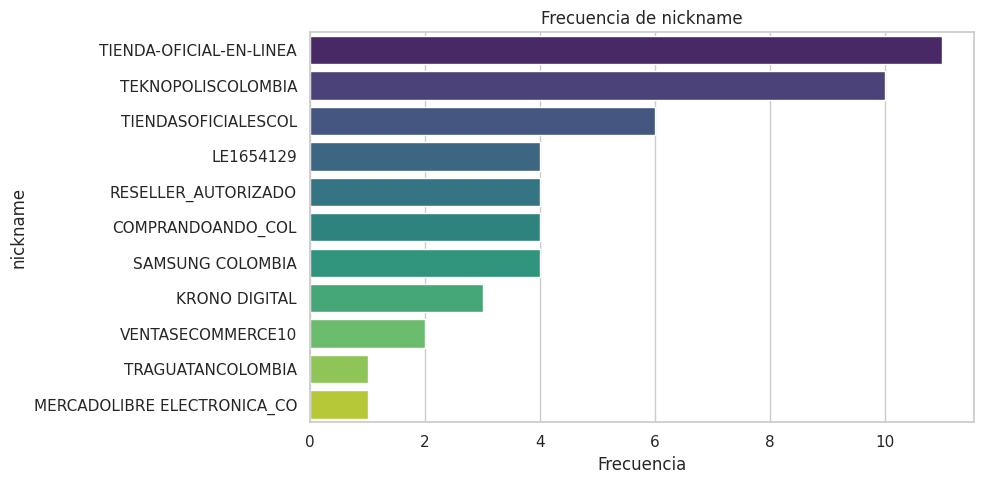

/tmp/ipykernel_116388/1700155425.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_col_with_nulls, order=order, palette='viridis')


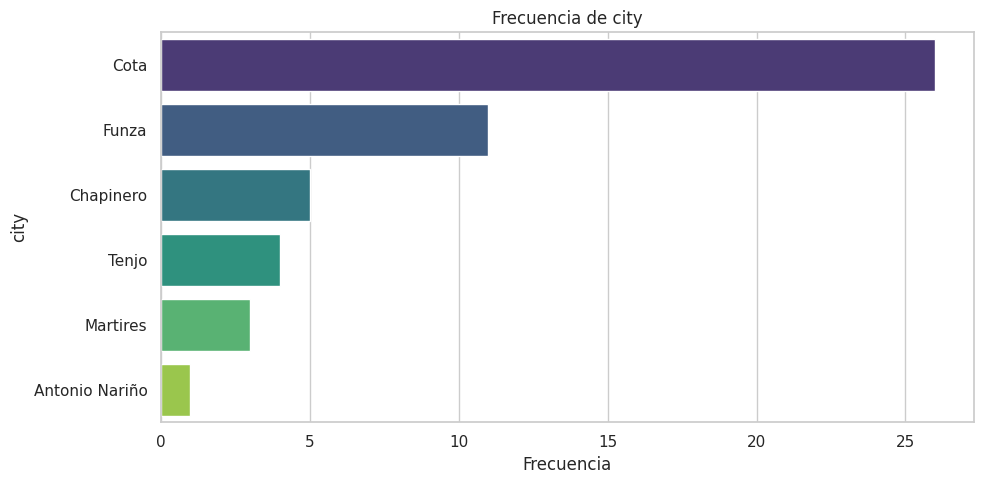

/tmp/ipykernel_116388/1700155425.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_col_with_nulls, order=order, palette='viridis')


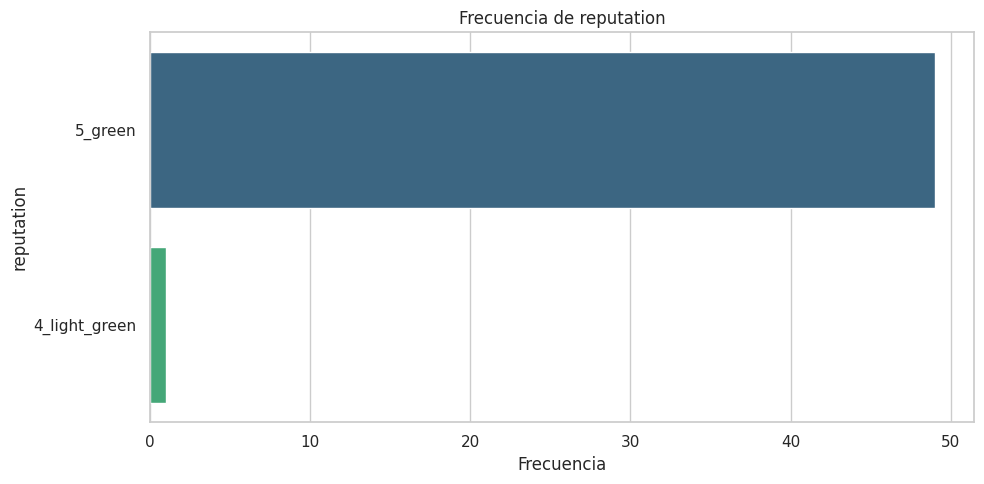

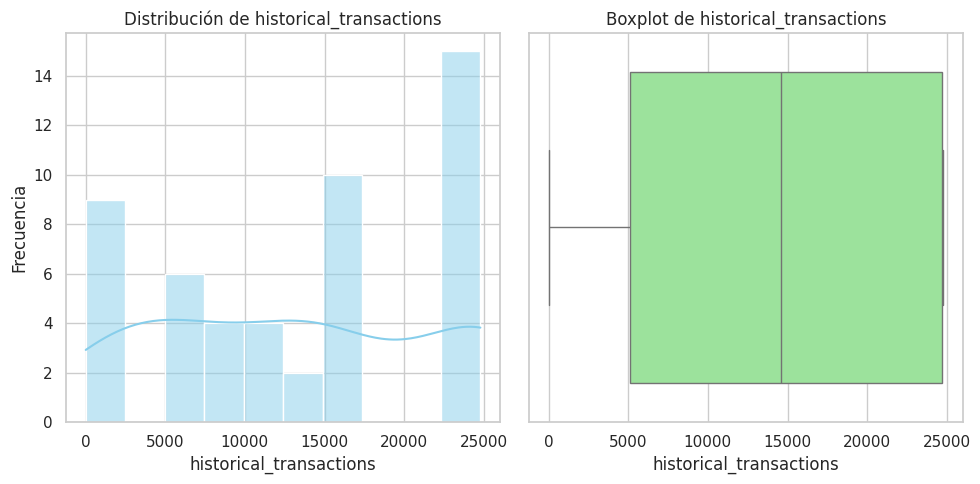

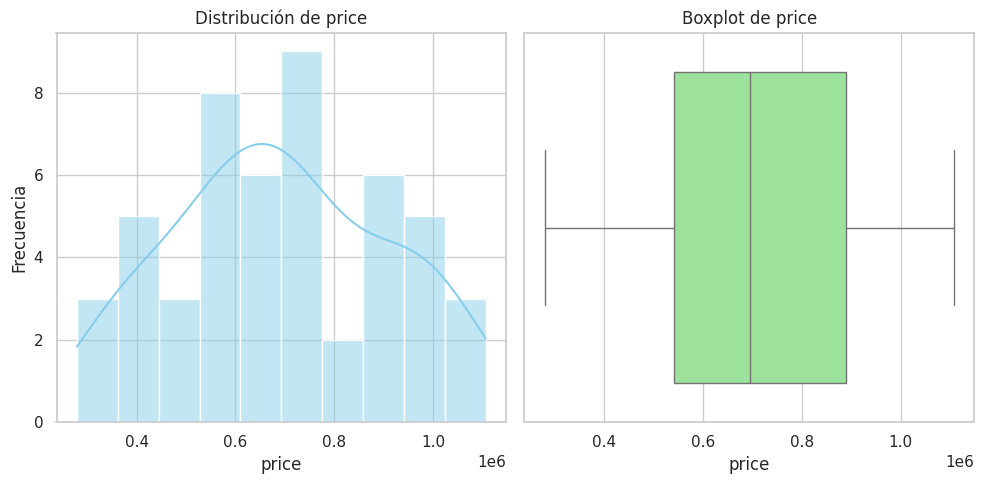

/tmp/ipykernel_116388/1700155425.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_col_with_nulls, order=order, palette='viridis')


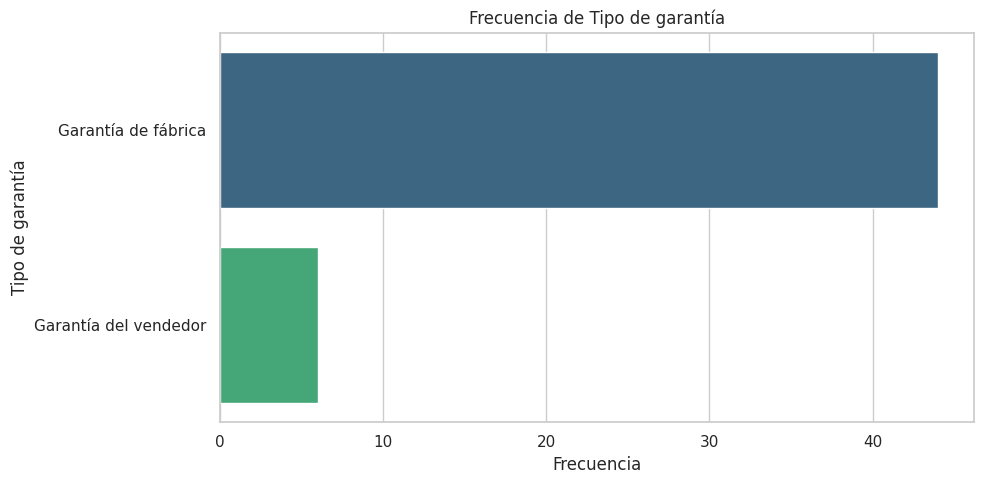

/tmp/ipykernel_116388/1700155425.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_col_with_nulls, order=order, palette='viridis')


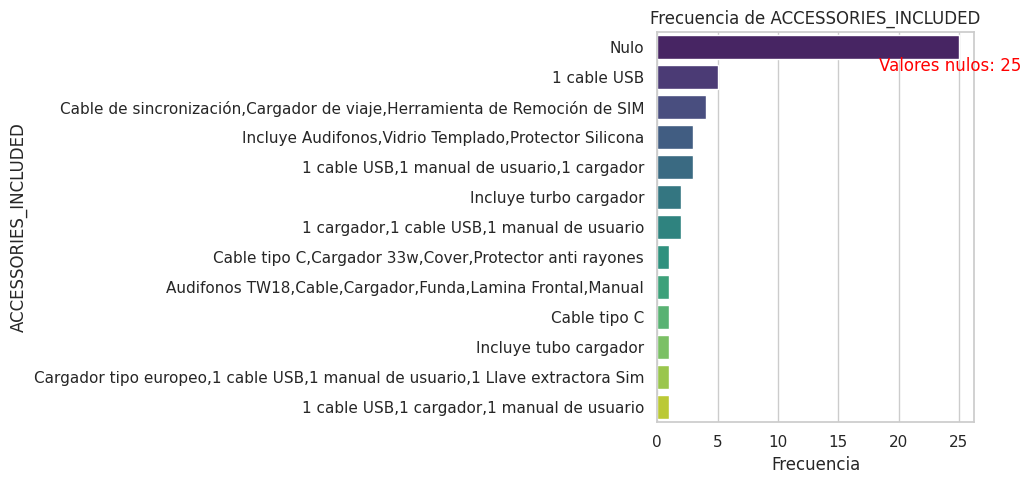

/tmp/ipykernel_116388/1700155425.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_col_with_nulls, order=order, palette='viridis')


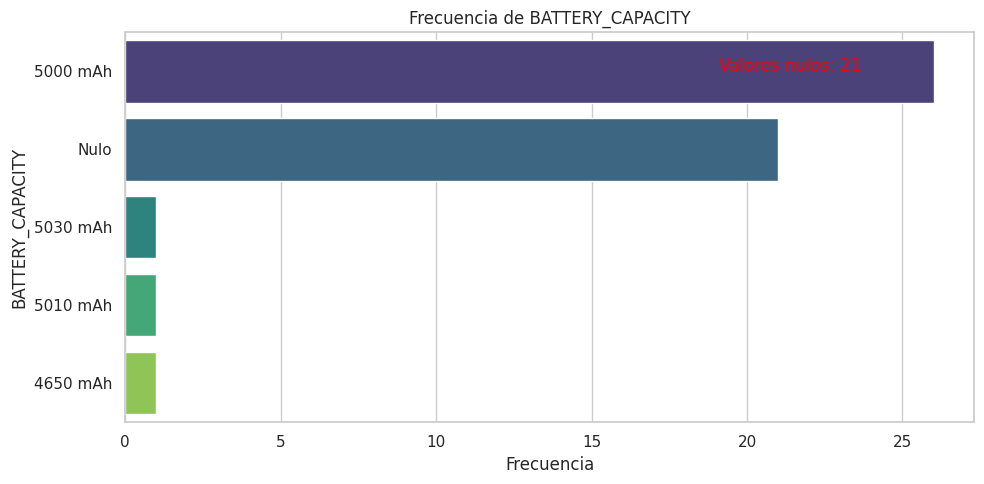

/tmp/ipykernel_116388/1700155425.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_col_with_nulls, order=order, palette='viridis')


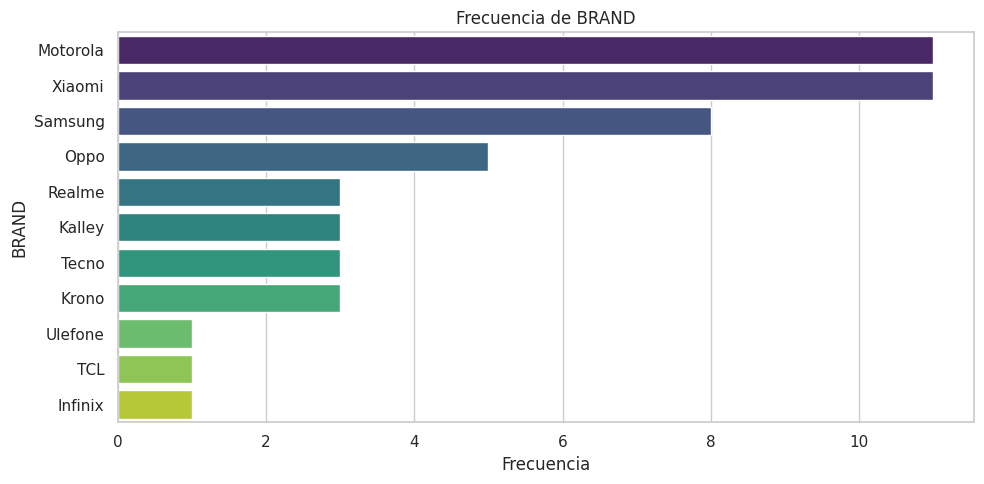

/tmp/ipykernel_116388/1700155425.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_col_with_nulls, order=order, palette='viridis')


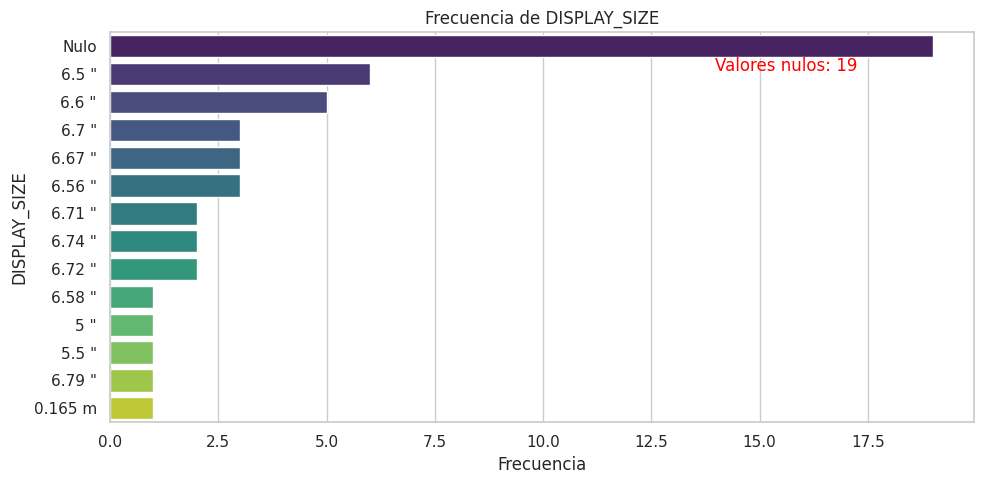

/tmp/ipykernel_116388/1700155425.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_col_with_nulls, order=order, palette='viridis')


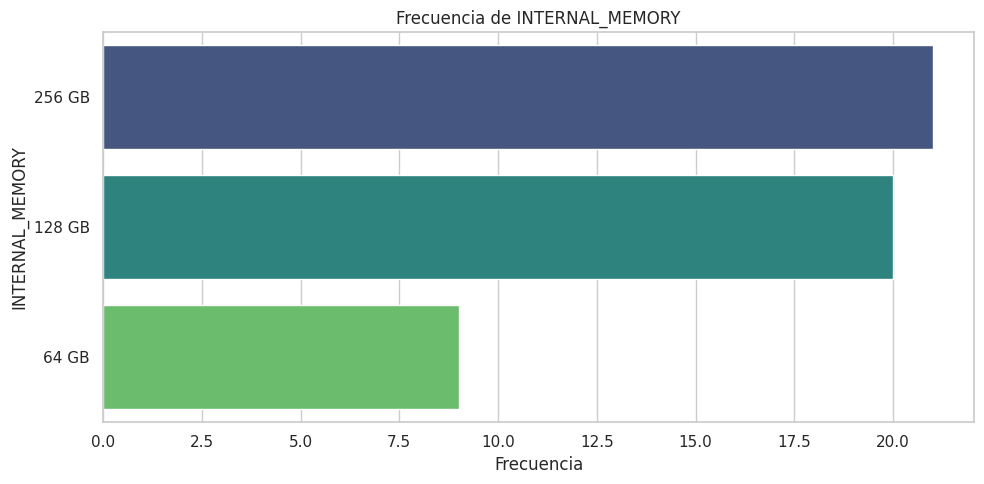

/tmp/ipykernel_116388/1700155425.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_col_with_nulls, order=order, palette='viridis')


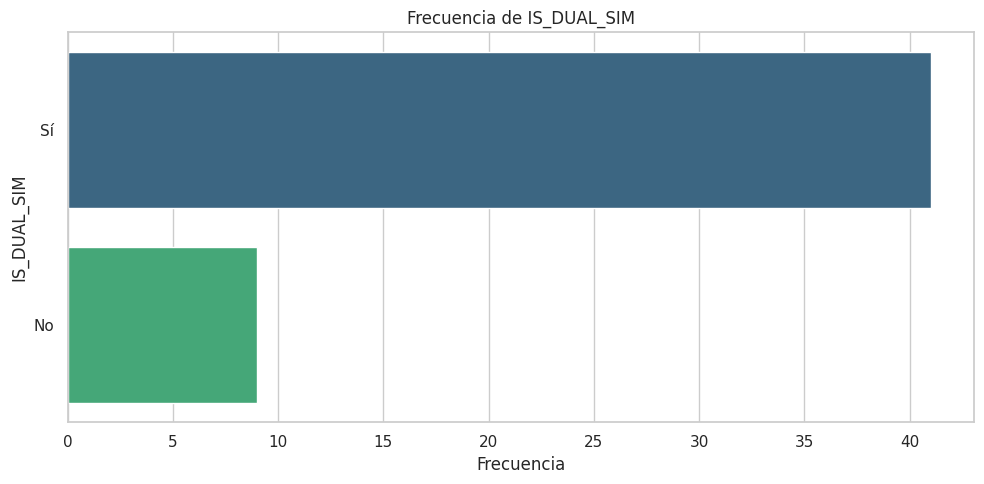

/tmp/ipykernel_116388/1700155425.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_col_with_nulls, order=order, palette='viridis')


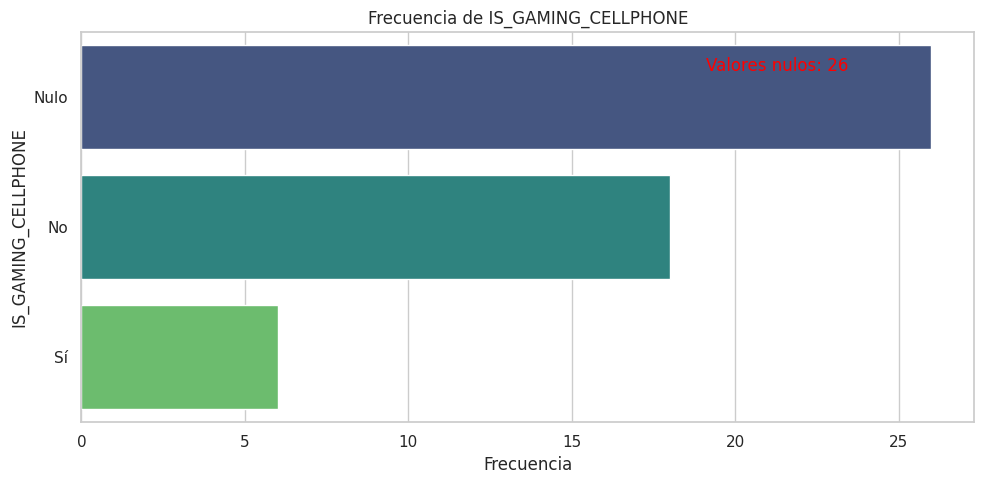

/tmp/ipykernel_116388/1700155425.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_col_with_nulls, order=order, palette='viridis')


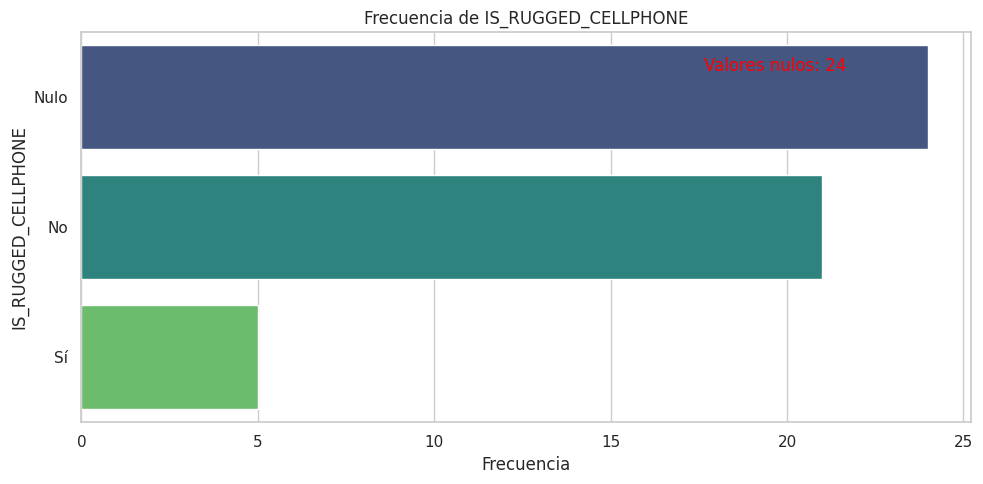

/tmp/ipykernel_116388/1700155425.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_col_with_nulls, order=order, palette='viridis')


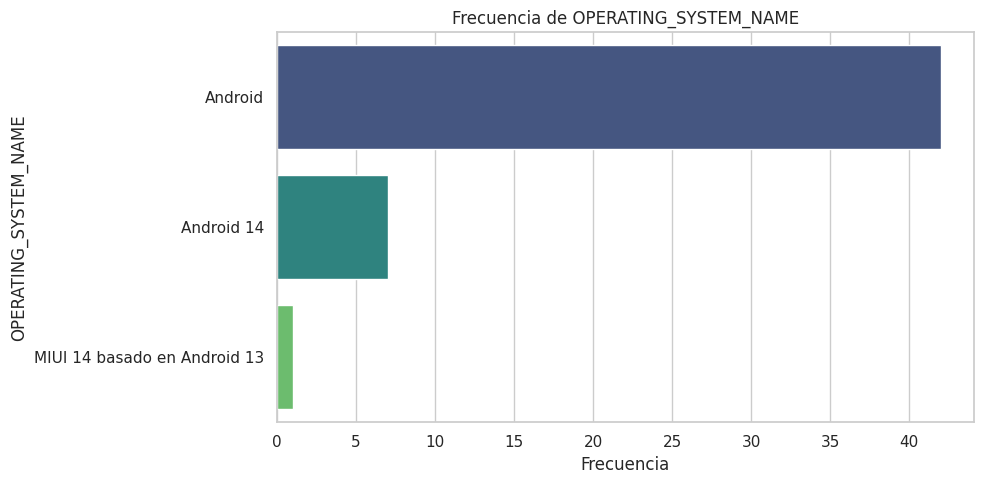

/tmp/ipykernel_116388/1700155425.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_col_with_nulls, order=order, palette='viridis')


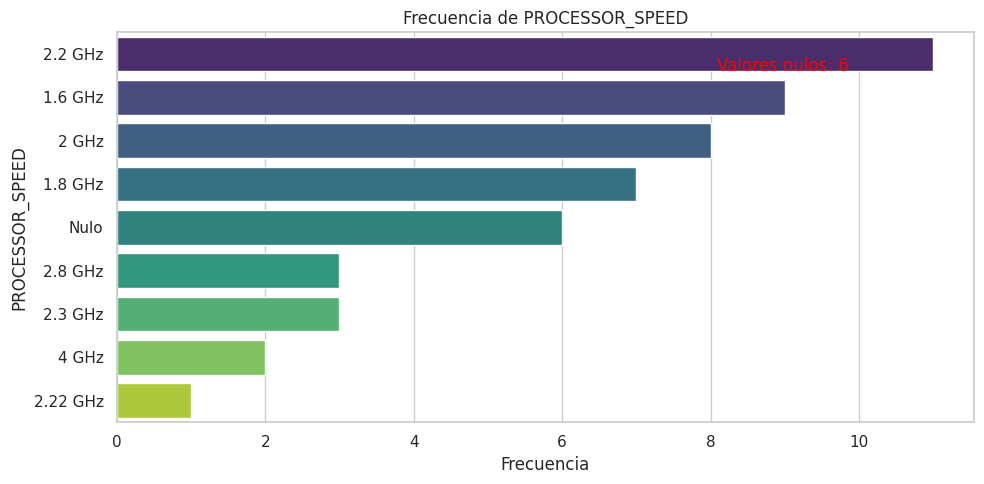

/tmp/ipykernel_116388/1700155425.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_col_with_nulls, order=order, palette='viridis')


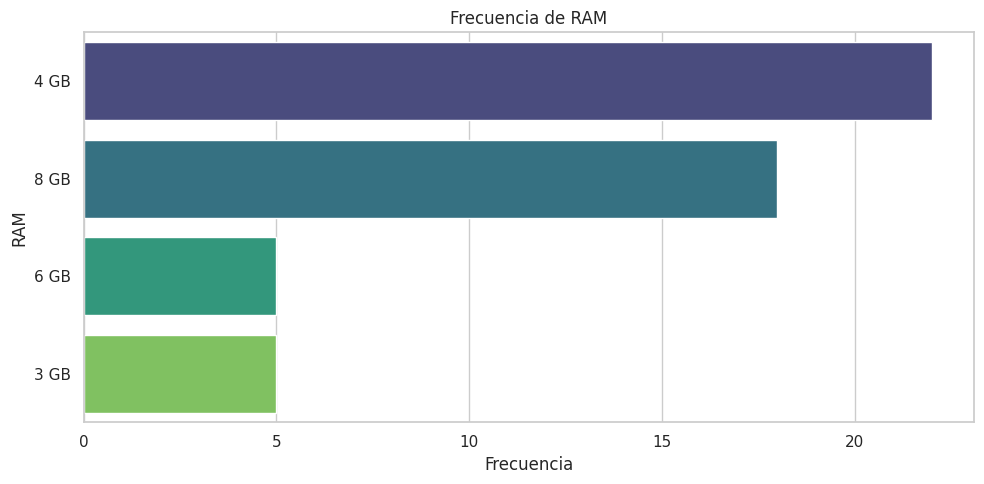

/tmp/ipykernel_116388/1700155425.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_col_with_nulls, order=order, palette='viridis')


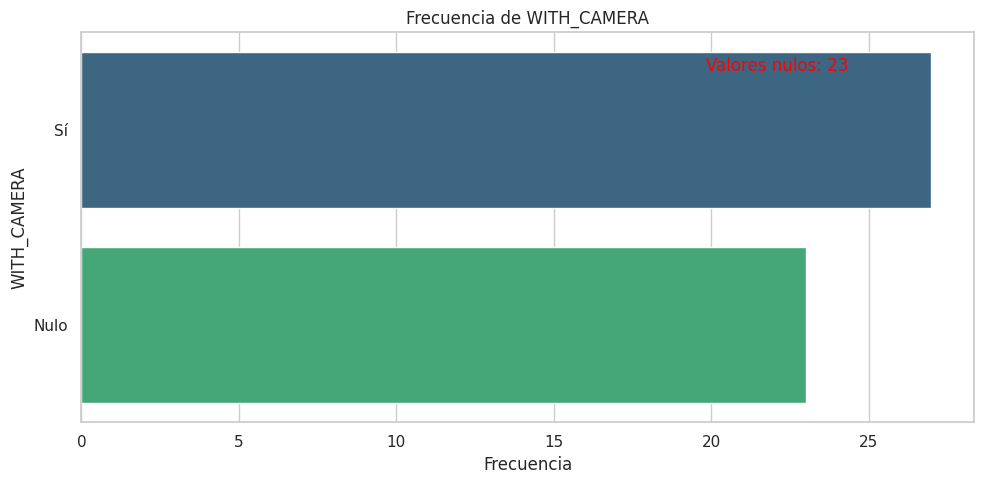

/tmp/ipykernel_116388/1700155425.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_col_with_nulls, order=order, palette='viridis')


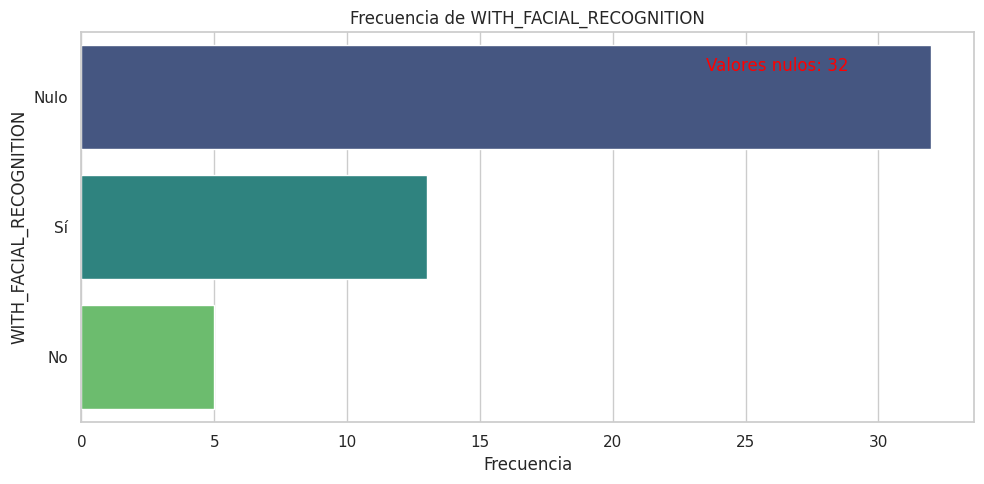

/tmp/ipykernel_116388/1700155425.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_col_with_nulls, order=order, palette='viridis')


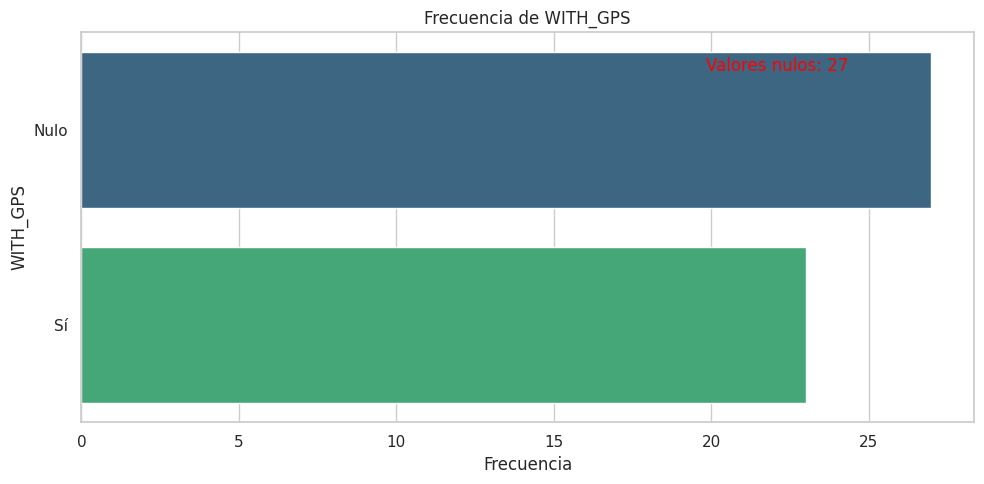

/tmp/ipykernel_116388/1700155425.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_col_with_nulls, order=order, palette='viridis')


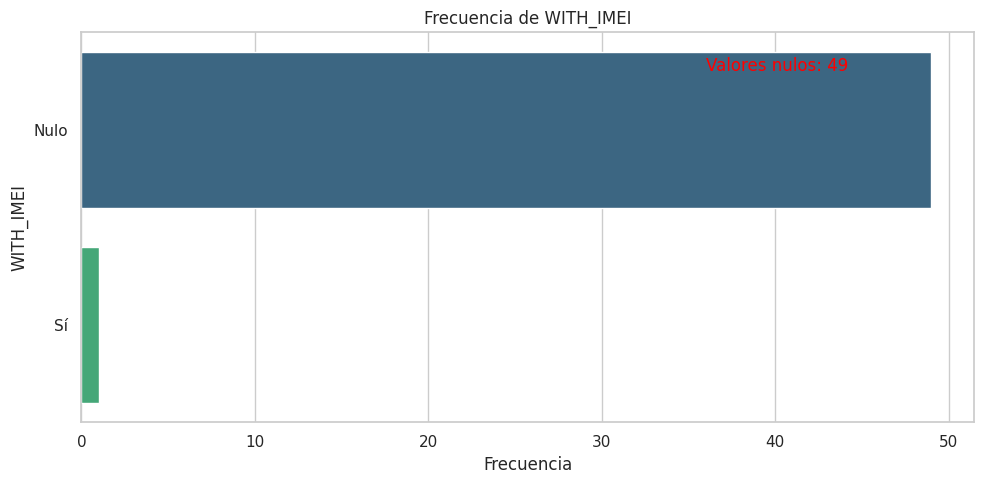

/tmp/ipykernel_116388/1700155425.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_col_with_nulls, order=order, palette='viridis')


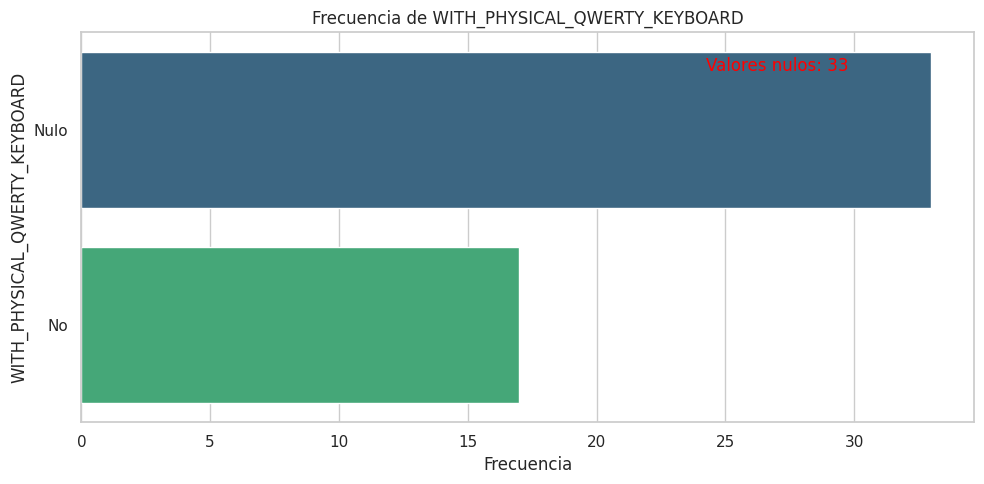

/tmp/ipykernel_116388/1700155425.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_col_with_nulls, order=order, palette='viridis')


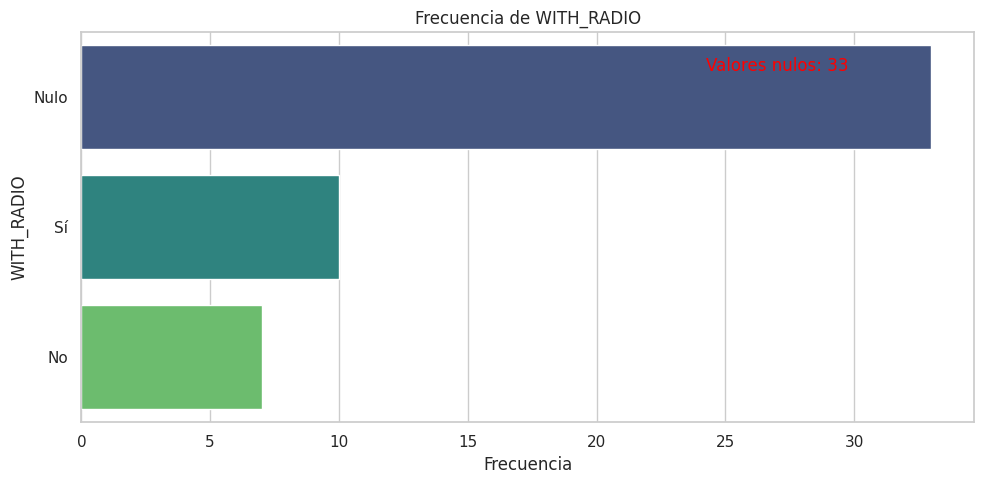

/tmp/ipykernel_116388/1700155425.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_col_with_nulls, order=order, palette='viridis')


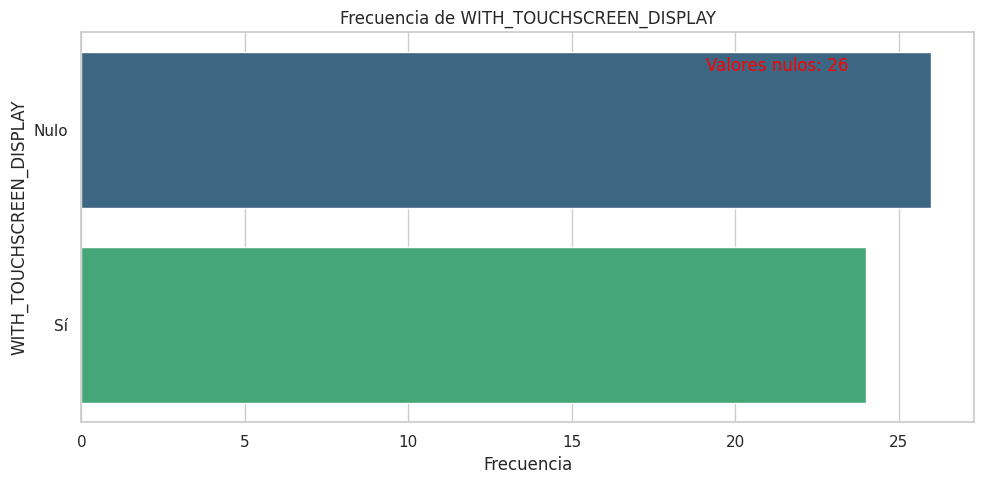

/tmp/ipykernel_116388/1700155425.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_col_with_nulls, order=order, palette='viridis')


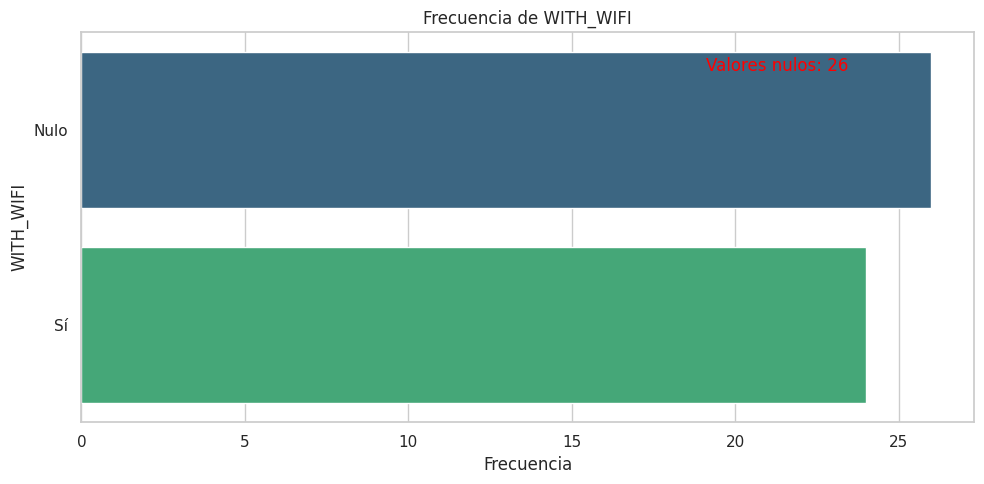

/tmp/ipykernel_116388/1700155425.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_col_with_nulls, order=order, palette='viridis')


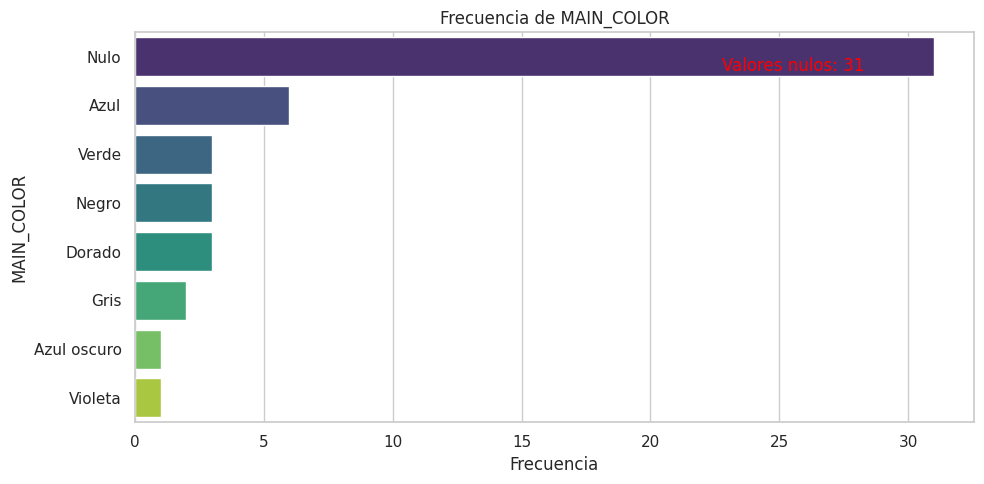

In [45]:
def plot_univariate_analysis(df):
    sns.set(style="whitegrid")
    
    for col in df.columns:
        if col == 'MODEL':
            continue
        plt.figure(figsize=(10, 5))
        
        null_count = df[col].isnull().sum()
        
        if pd.api.types.is_numeric_dtype(df[col]):
            plt.subplot(1, 2, 1)
            sns.histplot(df[col].dropna(), kde=True, bins=10, color='skyblue')
            plt.title(f'Distribución de {col}')
            plt.xlabel(col)
            plt.ylabel('Frecuencia')
            
            if null_count > 0:
                plt.annotate(f'Valores nulos: {null_count}', xy=(0.7, 0.9), xycoords='axes fraction', 
                             fontsize=12, color='red')

            plt.subplot(1, 2, 2)
            sns.boxplot(x=df[col].dropna(), color='lightgreen')
            plt.title(f'Boxplot de {col}')
            plt.xlabel(col)
            
            if null_count > 0:
                plt.annotate(f'Valores nulos: {null_count}', xy=(0.85, 0.9), xycoords='axes fraction', 
                             fontsize=12, color='red')

        elif pd.api.types.is_object_dtype(df[col]):

            df_col_with_nulls = df[col].fillna('Nulo')
            order = df_col_with_nulls.value_counts().index
            sns.countplot(y=df_col_with_nulls, order=order, palette='viridis')
            plt.title(f'Frecuencia de {col}')
            plt.xlabel('Frecuencia')
            plt.ylabel(col)
            
            if null_count > 0:
                plt.annotate(f'Valores nulos: {null_count}', xy=(0.7, 0.9), xycoords='axes fraction', 
                             fontsize=12, color='red')
        
        plt.tight_layout()
        plt.show()

plot_univariate_analysis(df_merged)

#### II. Análisis bivariado

/tmp/ipykernel_116388/1351661788.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


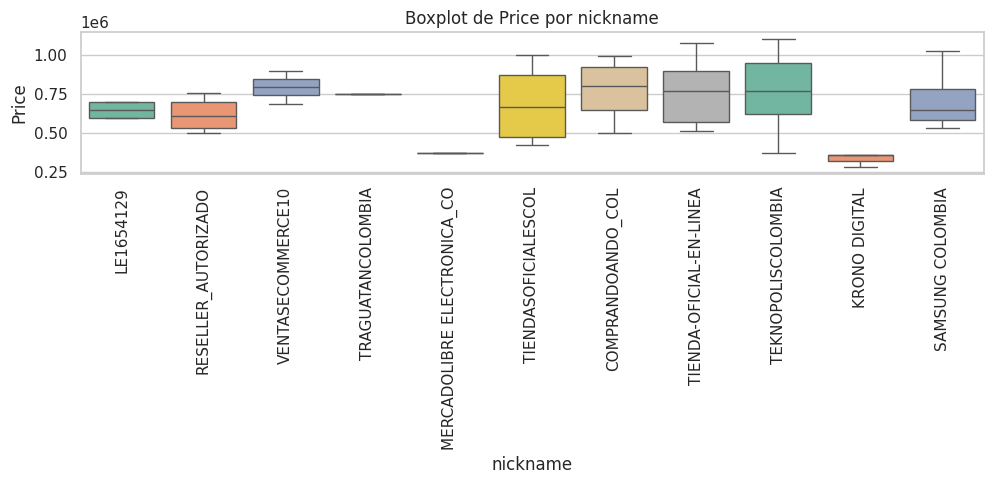

/tmp/ipykernel_116388/1351661788.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


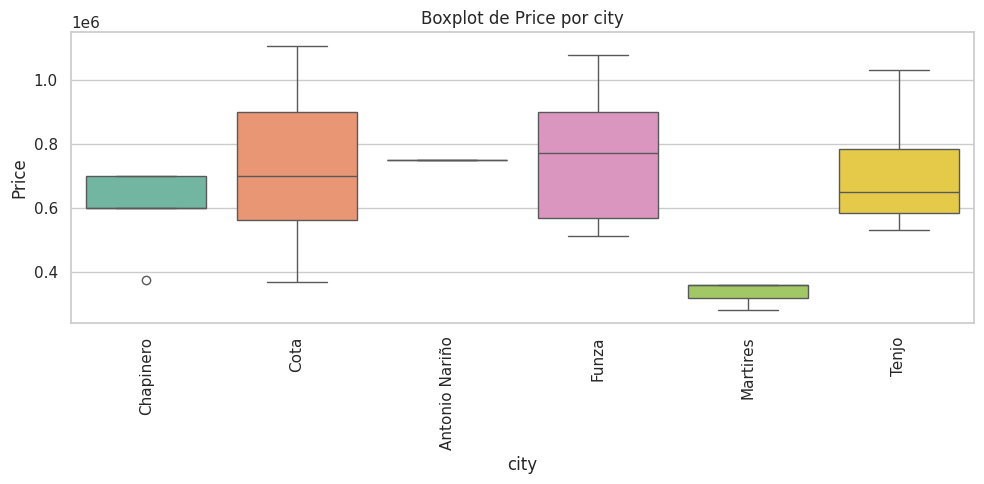

/tmp/ipykernel_116388/1351661788.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


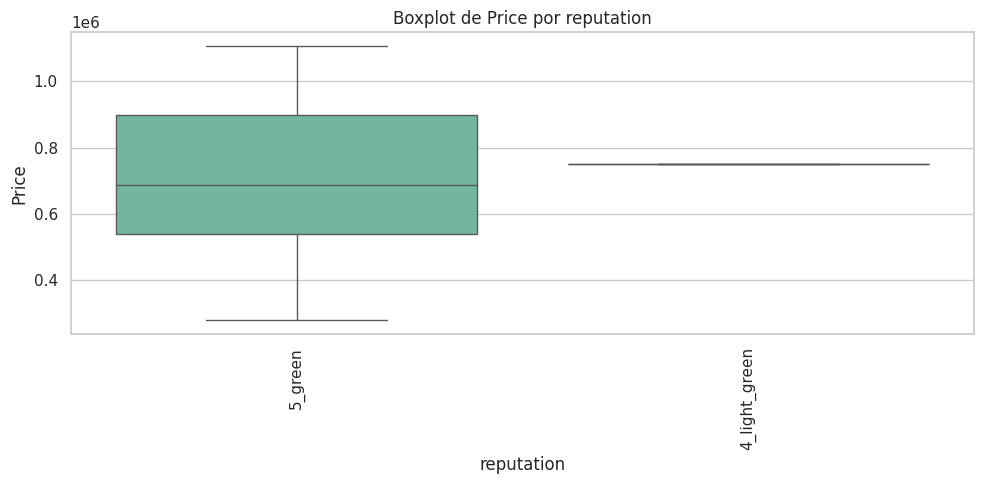

/tmp/ipykernel_116388/1351661788.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


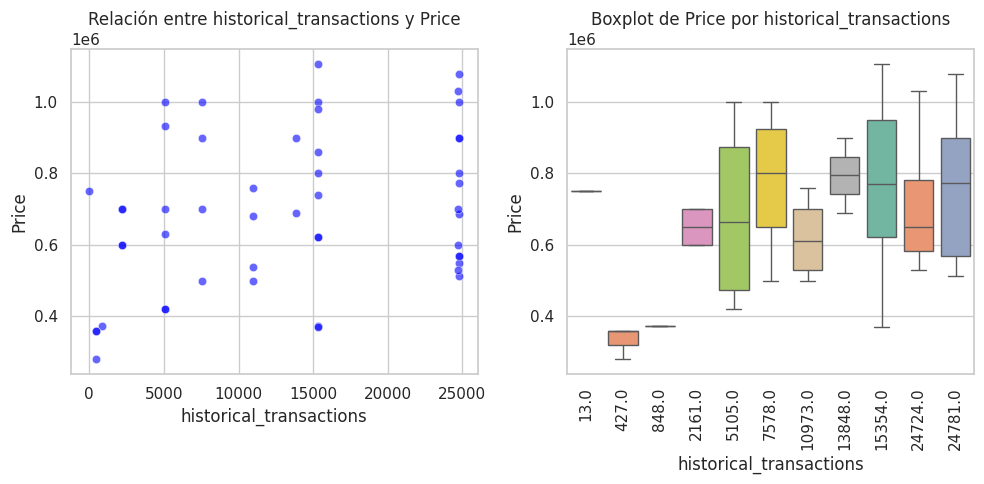

/tmp/ipykernel_116388/1351661788.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


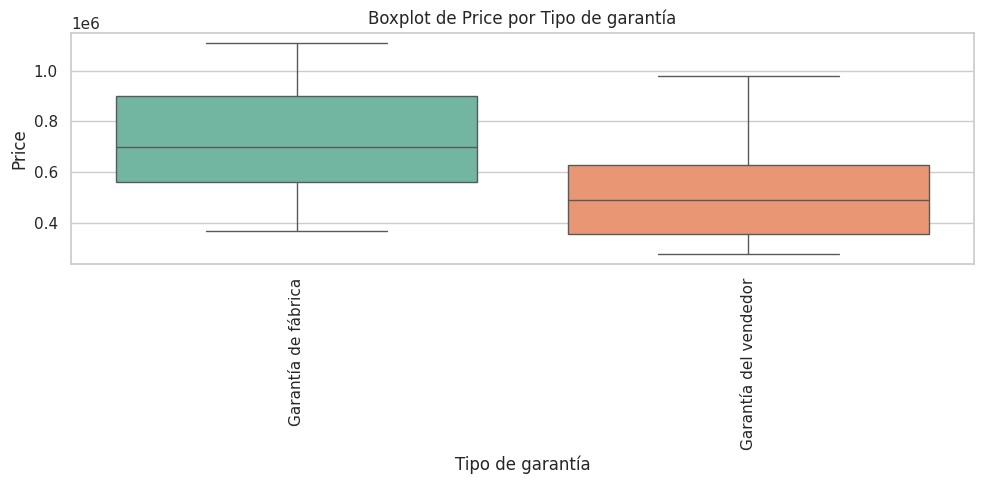

/tmp/ipykernel_116388/1351661788.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


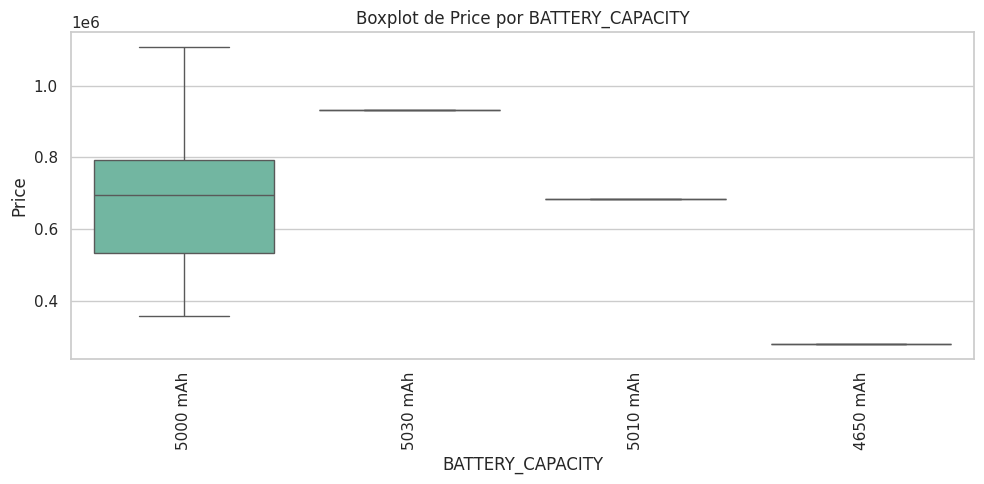

/tmp/ipykernel_116388/1351661788.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


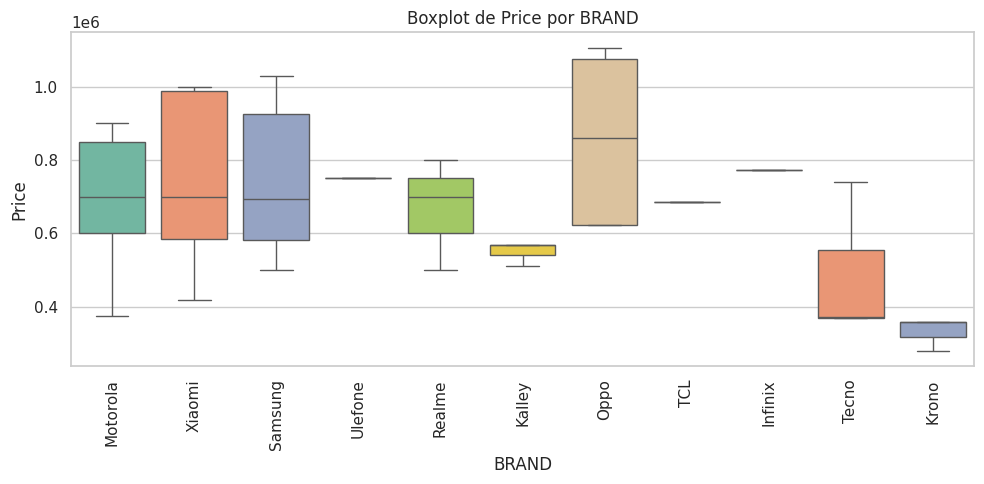

/tmp/ipykernel_116388/1351661788.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


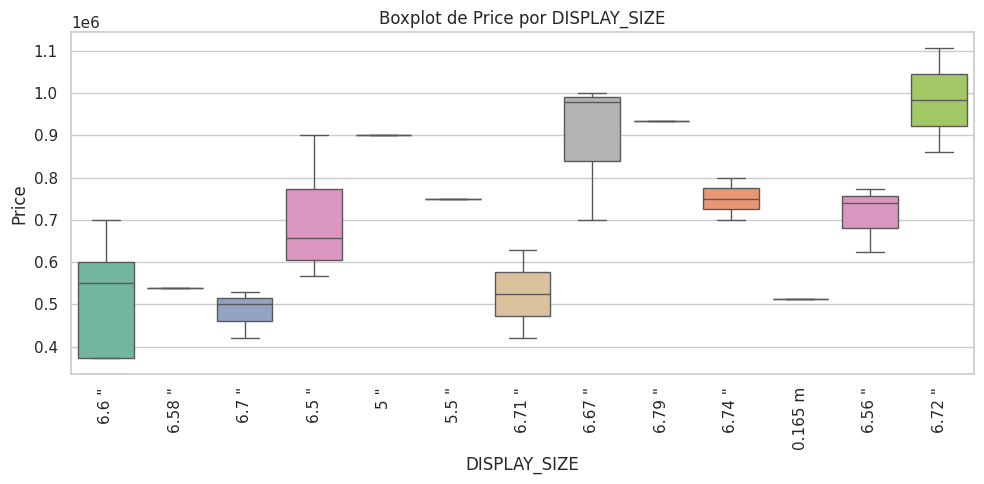

/tmp/ipykernel_116388/1351661788.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


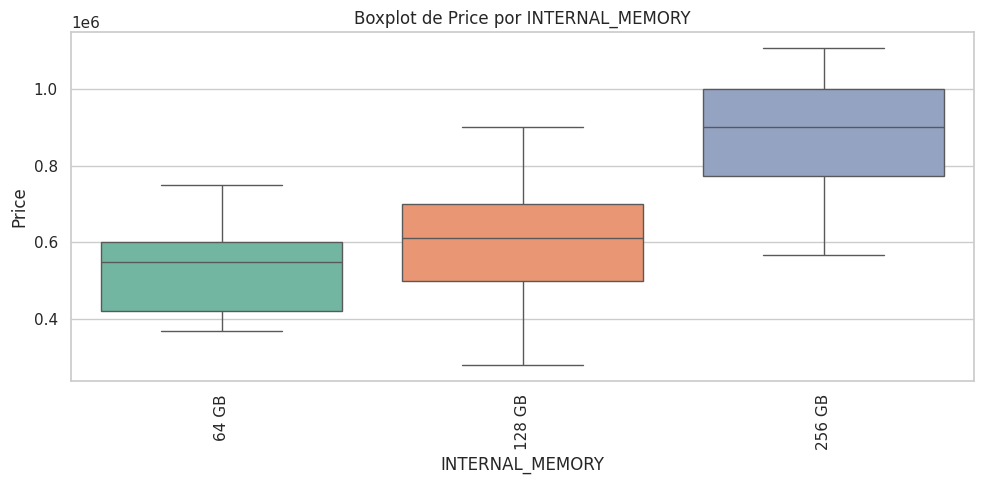

/tmp/ipykernel_116388/1351661788.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


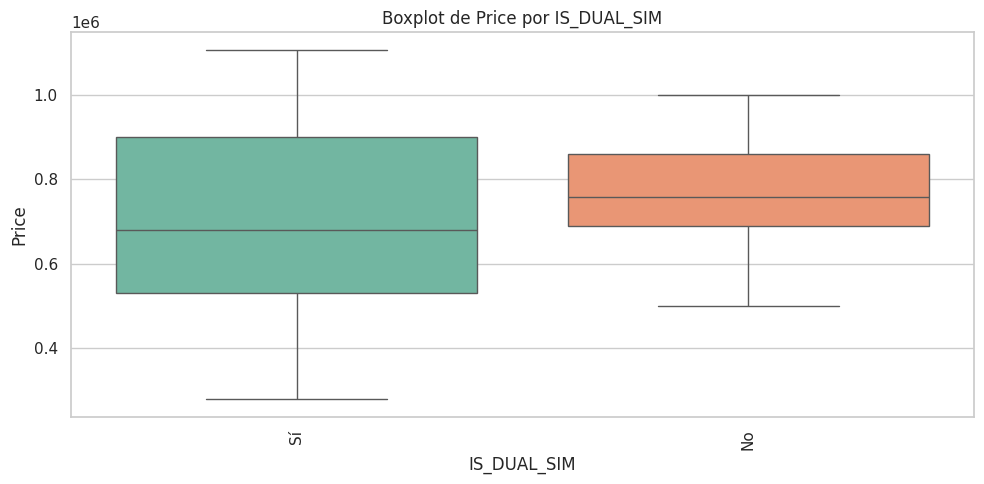

/tmp/ipykernel_116388/1351661788.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


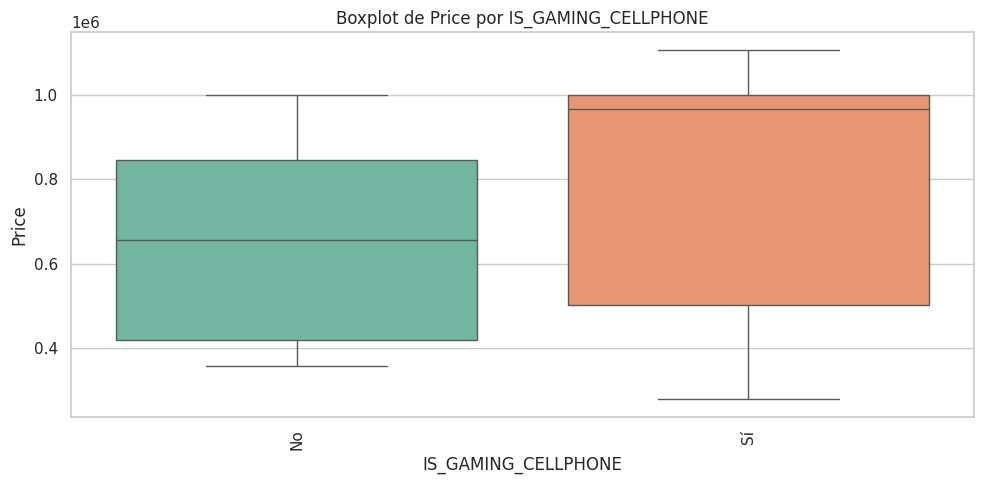

/tmp/ipykernel_116388/1351661788.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


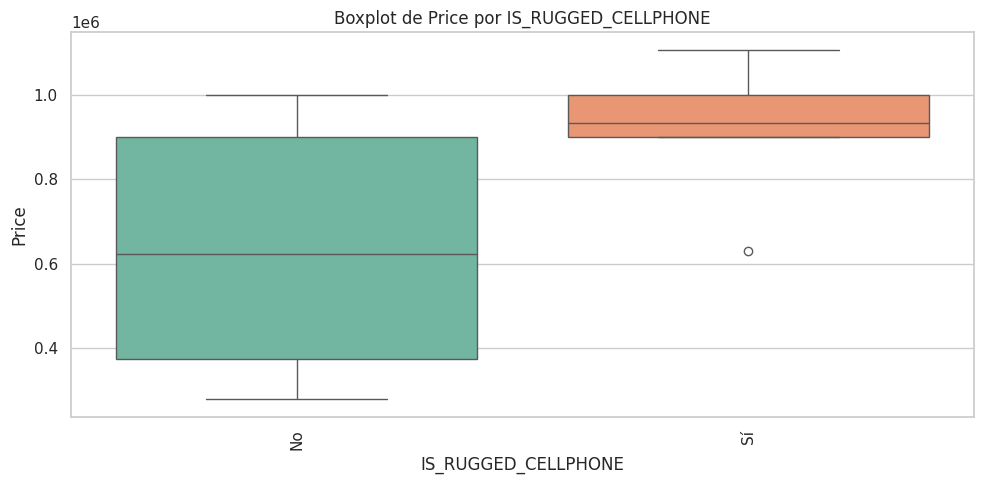

/tmp/ipykernel_116388/1351661788.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


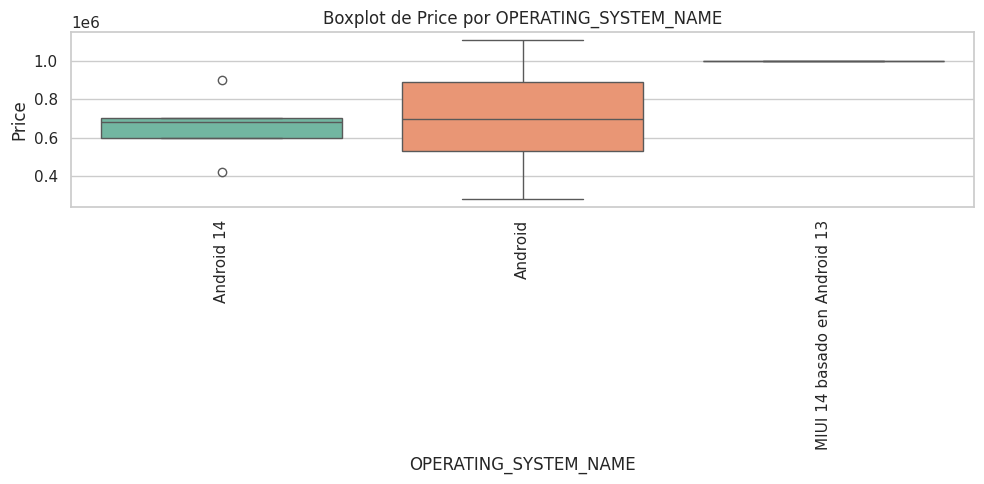

/tmp/ipykernel_116388/1351661788.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


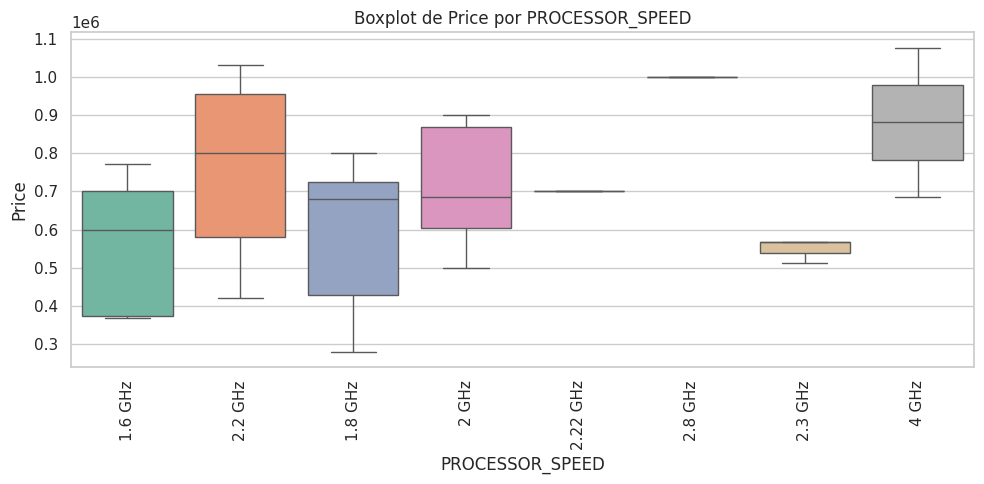

/tmp/ipykernel_116388/1351661788.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


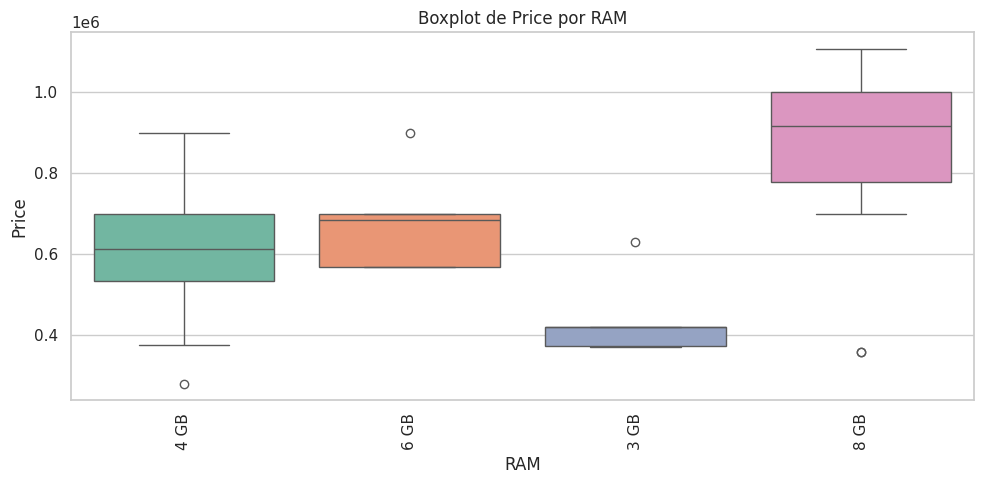

/tmp/ipykernel_116388/1351661788.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


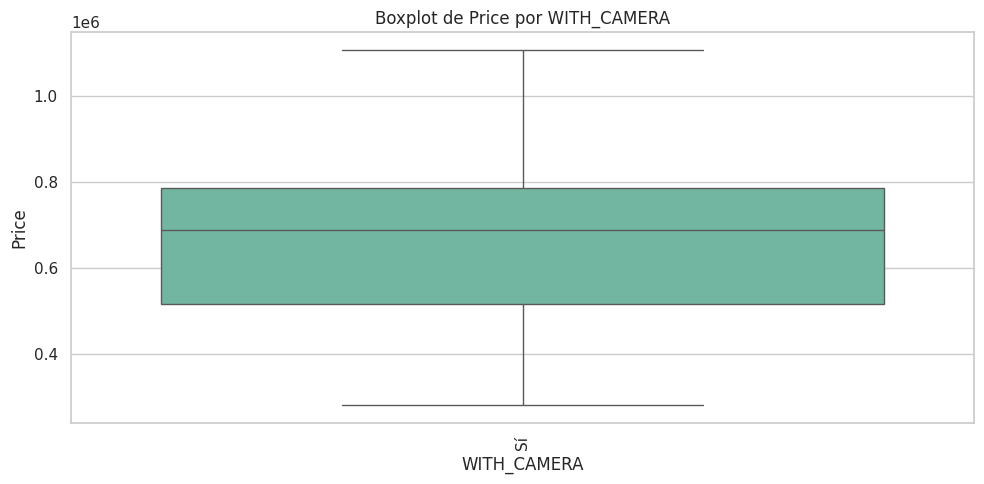

/tmp/ipykernel_116388/1351661788.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


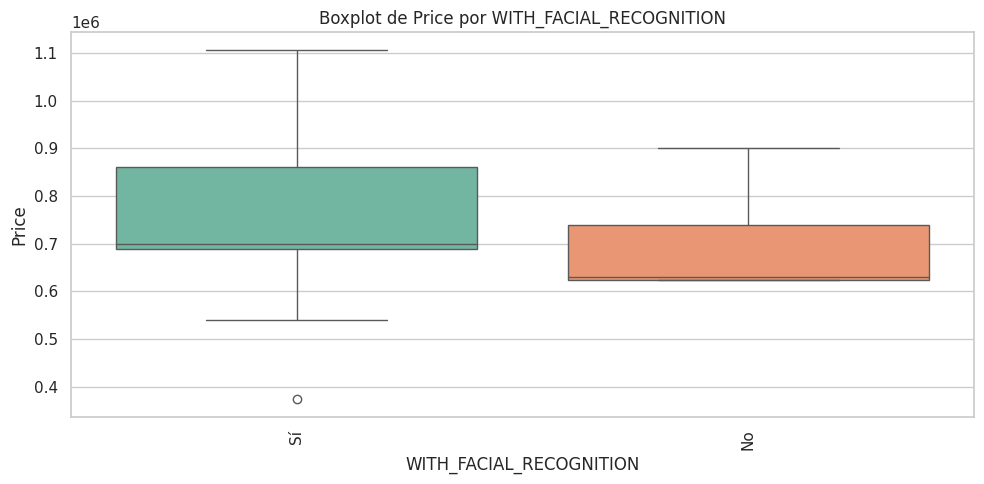

/tmp/ipykernel_116388/1351661788.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


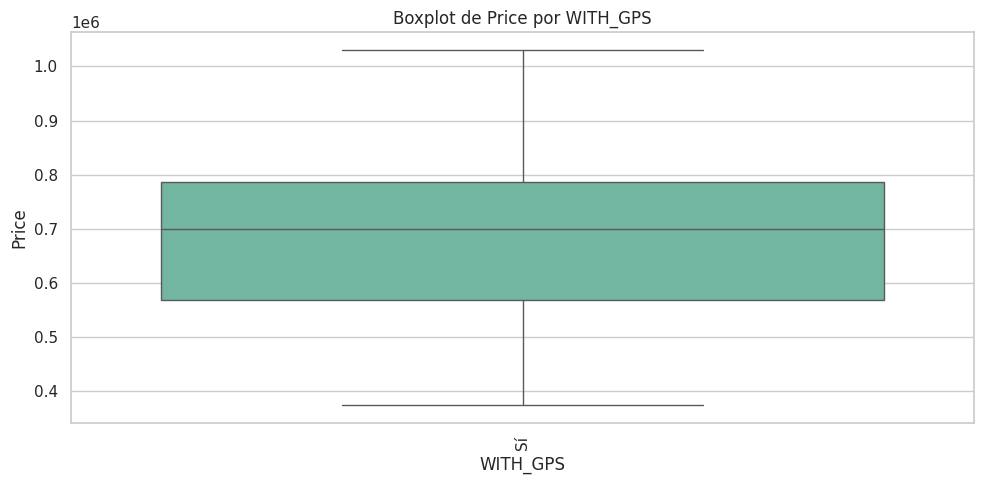

/tmp/ipykernel_116388/1351661788.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


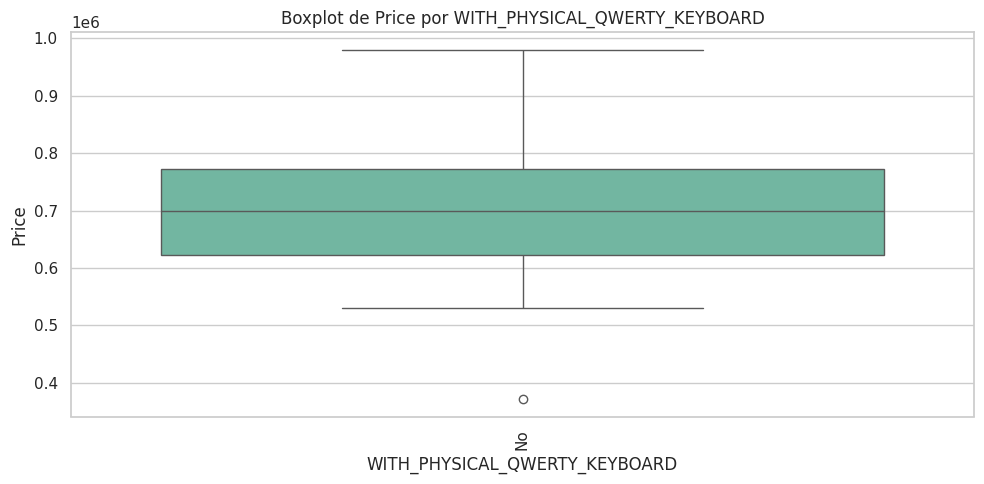

/tmp/ipykernel_116388/1351661788.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


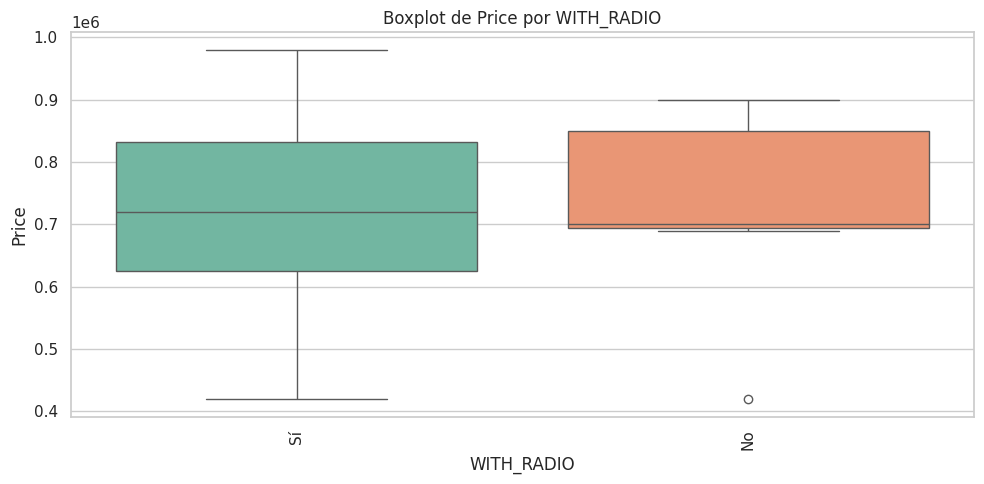

/tmp/ipykernel_116388/1351661788.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


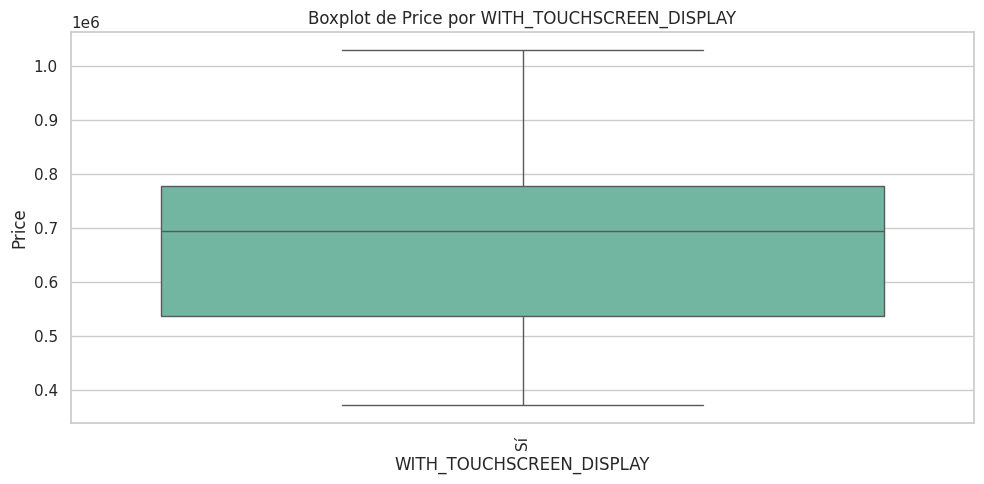

/tmp/ipykernel_116388/1351661788.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


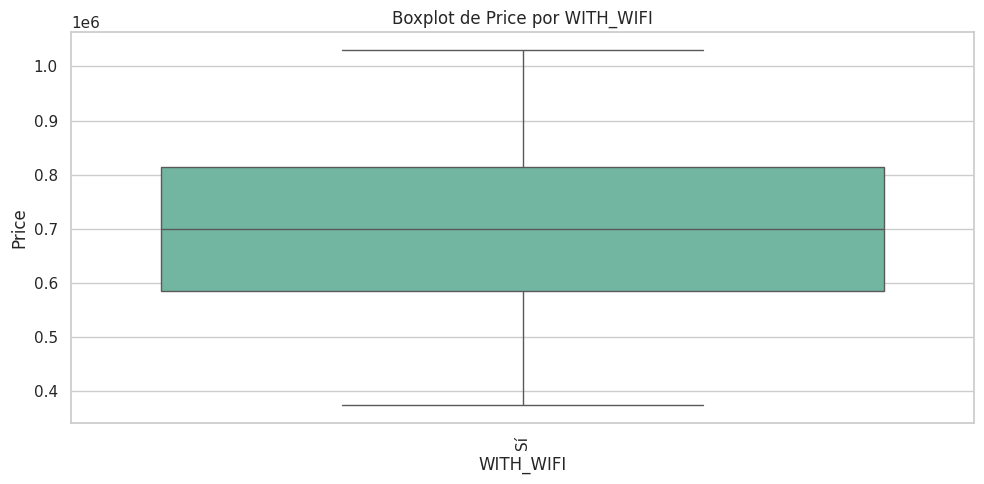

/tmp/ipykernel_116388/1351661788.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['price'], palette='Set2')


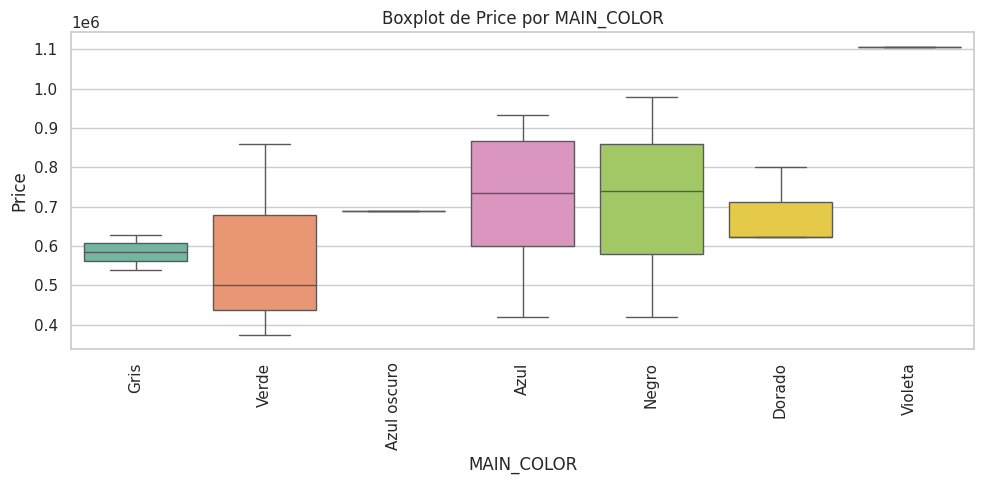

In [46]:
def bivariate_analysis_price(df):
    # Configuración de estilo
    sns.set(style="whitegrid")

    # Definir columnas a excluir
    exclude_columns = ['ACCESSORIES_INCLUDED', 'HISTORICAL_TRANSACTIONS', 'WITH_IMEI', 'MODEL']
    
    # Iterar sobre las columnas del DataFrame
    for col in df.columns:
        if col == 'price' or col in exclude_columns:
            continue  # Saltar la columna 'price' y las columnas excluidas

        plt.figure(figsize=(10, 5))

        # Si la columna es numérica
        if pd.api.types.is_numeric_dtype(df[col]):
            # Crear un scatter plot
            plt.subplot(1, 2, 1)
            sns.scatterplot(x=df[col], y=df['price'], color='blue', alpha=0.6)
            plt.title(f'Relación entre {col} y Price')
            plt.xlabel(col)
            plt.ylabel('Price')

            # Crear un boxplot
            plt.subplot(1, 2, 2)
            sns.boxplot(x=df[col], y=df['price'], palette='Set2')
            plt.title(f'Boxplot de Price por {col}')
            plt.xlabel(col)
            plt.ylabel('Price')
            plt.xticks(rotation=90)  # Rotar etiquetas del eje x

        # Si la columna es categórica
        elif pd.api.types.is_object_dtype(df[col]):
            # Crear un boxplot para mostrar la distribución del precio por categorías
            plt.subplot(1, 1, 1)
            sns.boxplot(x=df[col], y=df['price'], palette='Set2')
            plt.title(f'Boxplot de Price por {col}')
            plt.xlabel(col)
            plt.ylabel('Price')
            plt.xticks(rotation=90)  # Rotar etiquetas del eje x
        
        # Ajustar diseño
        plt.tight_layout()
        plt.show()

# Aplicar la función a tu DataFrame
bivariate_analysis_price(df_merged)

#### Insights

- Respecto a la frecuencia de tiendas: tienda oficial en línea, techno polis Colombia y tienda oficial col son las frecuentes  
- De acuerdo a los Intereses filtrados, Cota y Funza son las locaciones con mayor disponibilidad en Cundinamarca; en Bogotá lo es Chapinero  
- Estas tiendas se encuentran del rango entre los 5000 y las 20,000 transacciones con una media de  15,000 transacciones  
- De acuerdo con las características ofertadas y de acuerdo con el filtro, el precio medio de los celulares es de 690000 pesos
- En su mayoría, los celulares cuentan con garantía de fábrica y vienen sin accesorios incluidos
- No se reporta la capacidad de sus baterías, aunque en su mayoría la capacidad reportada es de 5000 mA
- Las marcas más frecuentes son Motorola Xiaomi y Samsung
- Aunque no se reportan en la totalidad de dispositivos el tamaño del display el más frecuente es el de 6.5 pulgadas
- Es posible encontrar dispositivos de 256 GB
- De acuerdo con el filtro, los celulares cuentan con doble slots para SIM Card
- Los dispositivos fitlrados no se reportan habilitados para el Gaming o la rudeza, lo cual es ideal para el perfil de la persona a regalarle el dispositivo
- En su mayoría de los dispositivos son Android
- La frecuencia del procesador más popular es de 2.2 GHz, aunque se pueden encontrar 1.6 GHz
- La RAM más frecuente para los dispositivos filtrados es de 4 GB aunque se encuentran también de 8 GB
- Los datos reportados no nos permiten determinar si los dispositivos en su totalidad cuentan con cámara, reconocimiento facial, GPS, IMEI, radio, Touch Screen, Wifi.
- Aunque no se reportan los colores, el más frecuente es el Azul

- La garantía del vendedor está relacionada con los precios más bajos en contraparte a la garantía de fábrica
- Escoger una mayor capacidad de la memoria eleva el precio en cerca de 300,000 pesos
- Los teléfonos de dual sim son más baratos

### b. ¿Qué tantas opciones (variabilidad) en función de la marca, precio u otros dos atributos relevantes hay en los celulares disponibles?

In [47]:
options_table = df_merged.groupby('BRAND').agg(
    average_price=('price', 'mean'),
    count=('price', 'size')
).reset_index()

options_table.sort_values(by=['count', 'average_price'], ascending=[False, True], inplace=True)
options_table

,BRAND,average_price,count
3,Motorola,707500.545455,11
10,Xiaomi,754479.454545,11
6,Samsung,743675.000000,8
4,Oppo,857900.000000,5
2,Krono,331700.000000,3
8,Tecno,493566.666667,3
1,Kalley,549233.333333,3
5,Realme,666566.666667,3
7,TCL,684900.000000,1
9,Ulefone,749950.000000,1


Hay 10 opciones de dispositivos respecto a la marca y la media de precios. Encontrando la mayoria de disposivos Motorola, Xiaomi y Samsung con 11, 11 y 8 disposivos respectivamente; y 707500 COP, 754479 COP y 743675 COP respectivamente.

## 3

#### a. Diseño de la estrategia

Con el objetivo de seleccionar el celular ideal, propongo implementar una estrategia basada en la prueba ANOVA para evaluar la significancia de diversas variables categóricas en relación con el precio de los celulares. Primero, identificaremos variables categóricas relevantes, tales como la marca, el tipo de garantía y el sistema operativo, que podrían influir en el precio del producto. Posteriormente, se realizarán pruebas ANOVA de un solo factor para cada una de estas variables, permitiendo así comparar las medias de precios entre los diferentes grupos definidos por cada categoría. En caso de que alguna variable categórica presente un valor p menor a un nivel de significancia establecido (por ejemplo, 0.05), consideraremos que esta variable tiene un efecto significativo sobre el precio. Con estos resultados, se podrá realizar un análisis más profundo sobre las combinaciones de características que ofrezcan la mejor relación calidad-precio, facilitando al joven la toma de decisiones informadas al seleccionar el celular que mejor se ajuste a las necesidades y presupuesto.

#### *¿ Cuales considera que son los pasos más importantes para seleccionar el celular ideal?*

Utilizar un análisis estadístico, como ANOVA, para evaluar la relación entre variables categóricas (como marca, tipo de garantía y otras características informáticas) y el precio. Esto permitirá identificar cuáles de estas variables tienen un impacto significativo en el costo del celular, facilitando la comparación entre diferentes marcas y sus respectivos modelos.

In [48]:
df_merged.columns

Index(['nickname', 'city', 'reputation', 'historical_transactions', 'price',
       'Tipo de garantía', 'ACCESSORIES_INCLUDED', 'BATTERY_CAPACITY', 'BRAND',
       'DISPLAY_SIZE', 'INTERNAL_MEMORY', 'IS_DUAL_SIM', 'IS_GAMING_CELLPHONE',
       'IS_RUGGED_CELLPHONE', 'OPERATING_SYSTEM_NAME', 'PROCESSOR_SPEED',
       'RAM', 'WITH_CAMERA', 'WITH_FACIAL_RECOGNITION', 'WITH_GPS',
       'WITH_IMEI', 'WITH_PHYSICAL_QWERTY_KEYBOARD', 'WITH_RADIO',
       'WITH_TOUCHSCREEN_DISPLAY', 'WITH_WIFI', 'MAIN_COLOR', 'MODEL'],
      dtype='object')

#### b. Proceso de selección con prueba estadística con significancia

In [49]:
model = ols('price ~ C(BRAND) + C(city) + C(BRAND) + C(IS_DUAL_SIM) + C(RAM)', data=df_merged).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

#### c. Proceso para recomendar el celular que se debe comprar.

In [50]:
print(anova_table)

                      sum_sq    df          F        PR(>F)
C(BRAND)        7.121783e+11  10.0   5.327436  1.319795e-04
C(city)         2.148566e+11   5.0   3.214460  1.834373e-02
C(IS_DUAL_SIM)  9.960848e+08   1.0   0.074512  7.866312e-01
C(RAM)          8.897932e+11   3.0  22.186933  5.866728e-08
Residual        4.277800e+11  32.0        NaN           NaN


- La marca (BRAND) tiene un valor p de 0.0001319795, es significativamente menor que 0.05. Esto sugiere que hay diferencias estadísticamente significativas en los precios entre al menos algunas de las marcas. 
- La variable ciudad (city) también tiene un valor p de 0.01834373, lo que indica que las diferencias en el precio entre las ciudades son significativas.
- La variable RAM muestra un valor p extremadamente bajo, lo que indica que hay diferencias significativas en el precio de los celulares según la cantidad de RAM.

**Para recomendar el celular, el proceso es escoger aquel que a partir del precio, pueda entregarme más RAM, sabiendo que la localidad donde se compre influirá junto con la marca.**

Para ello seleccionaria el que en el rango de precio de 700.000 aprox, me de la mayor RAM (6GB) y la frecuencia de procesador de 2.2GHz. Seguramente en Chapinero, ya que comprar fuera de Bogotá eleva el precio. La marca mas viable deseleccionar es Motorola y el color será el Azul.

Enlace repo:

```https://github.com/jaagomezmu/ciencia_datos_parcial1```